In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
import missingno as msno 

In [2]:
# load the data

df = pd.read_csv('cleaned_data.csv')


In [3]:
df.isnull().sum().reset_index()

,index,0
0,rider_id,0
1,age,1854
2,ratings,1908
3,restaurant_latitude,3630
4,restaurant_longitude,3630
5,delivery_latitude,3630
6,delivery_longitude,3630
7,order_date,0
8,weather_conditions,525
9,traffic,510


In [4]:
# check for duplicate rows in the data

df.duplicated().sum()

0

In [5]:
df.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather_conditions       object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken (min)          int64
city_name                object
order_day                 int64
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_day        object
distance                float64
dtype: object

In [6]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken (min)', 'city_name', 'order_day',
       'order_month', 'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [7]:
df.columns[[1,2,3,4,5,6,16,22,25]].tolist()

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken (min)',
 'pickup_time_minutes',
 'distance']

In [8]:
# numerical and categorical columns

num_cols = df.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols = [col for col in df.columns.tolist() if col not in num_cols]

print(f'There are {len(num_cols)} numerical columns and {len(cat_cols)} categorical columns in the data.')

There are 9 numerical columns and 17 categorical columns in the data.


In [9]:
cat_cols

['rider_id',
 'order_date',
 'weather_conditions',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day']

In [10]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken (min)',
 'pickup_time_minutes',
 'distance']

In [11]:
# statistical summary of numerical columns

df[num_cols].describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,time_taken (min),pickup_time_minutes,distance
count,43639.000000,43585.000000,41863.000000,41863.000000,41863.000000,41863.000000,45493.000000,35407.000000,41863.000000
mean,29.554779,4.635280,18.914343,76.921308,18.978001,76.984966,26.296947,9.944926,9.718969
std,5.761378,0.313851,5.467303,3.503181,5.469095,3.503331,9.386912,4.086433,5.602425
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,10.000000,5.000000,1.470000
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,19.000000,5.000000,4.660000
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,26.000000,10.000000,9.190000
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,32.000000,15.000000,13.680000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,54.000000,15.000000,20.970000


In [12]:
# statistical summary of categorical columns

(
    df
    .assign(**{
        col: df[col].astype("object")
        for col in cat_cols
    })
    .describe(include="object").T
)

,count,unique,top,freq
rider_id,45493,1320,JAPRES11DEL02,67
order_date,45493,44,2022-03-15,1190
weather_conditions,44968,6,Fog,7653
traffic,44983,4,low,15476
vehicle_condition,45493,4,2,15031
type_of_order,45493,4,snack,11509
type_of_vehicle,45493,4,motorcycle,26421
multiple_deliveries,44500.0,4.0,1.0,28101.0
festival,45265,2,no,44371
city_type,44295,3,metropolitian,34023


<Axes: >

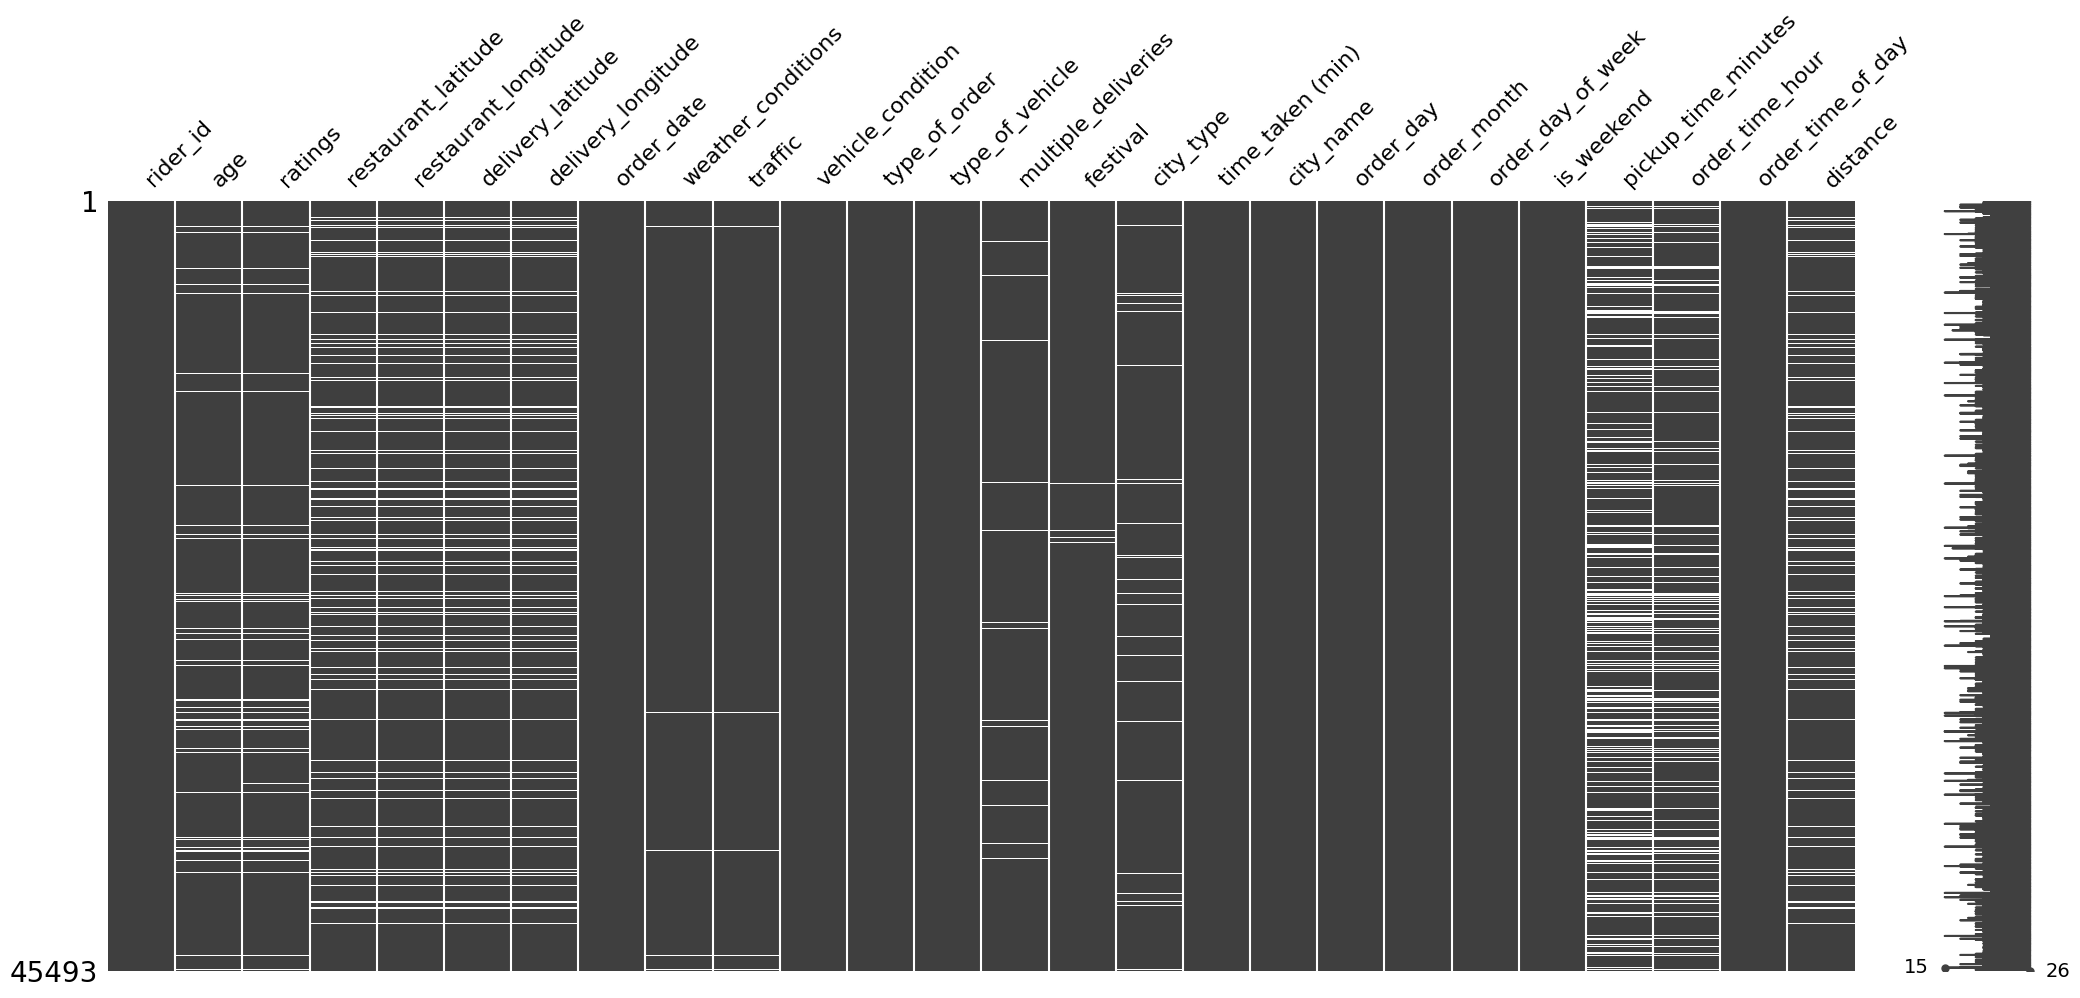

In [13]:
msno.matrix(df)

## Dendogram

<Axes: >

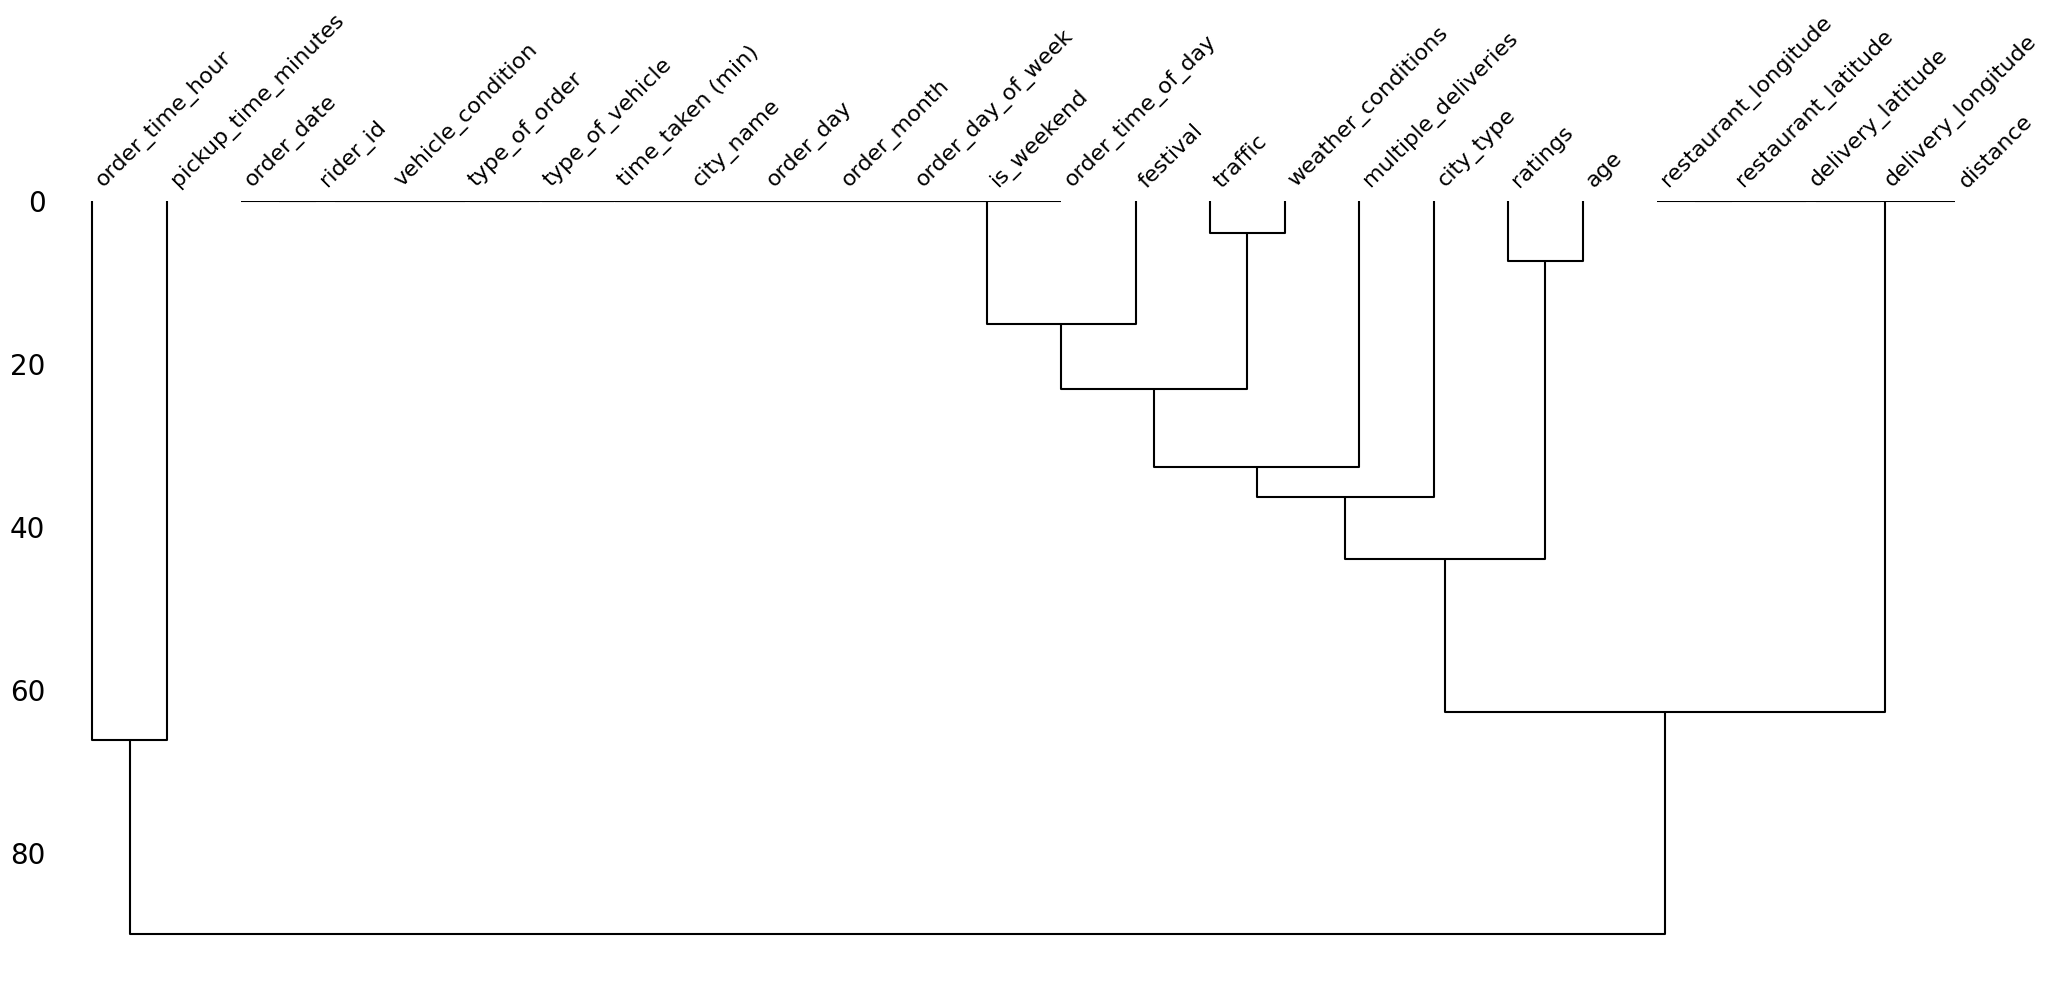

In [14]:
msno.dendrogram(df)

In [15]:
## Univariate
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    
    # create the figure
    fig = plt.figure(figsize=(15,10))
    # generate the layout
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    # set subplots
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    
    # plot the kdeplot
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    
    # plot the boxplot
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    
    # plot the histogram
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()

# Bivariate
def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()


def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()


def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    '''
    Two categorical variables 
    '''
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

## Jarquebera test 
def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")


## Column_Wise Analysis 

In [16]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken (min)', 'city_name', 'order_day',
       'order_month', 'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

## target-cols --> time_taken (min)

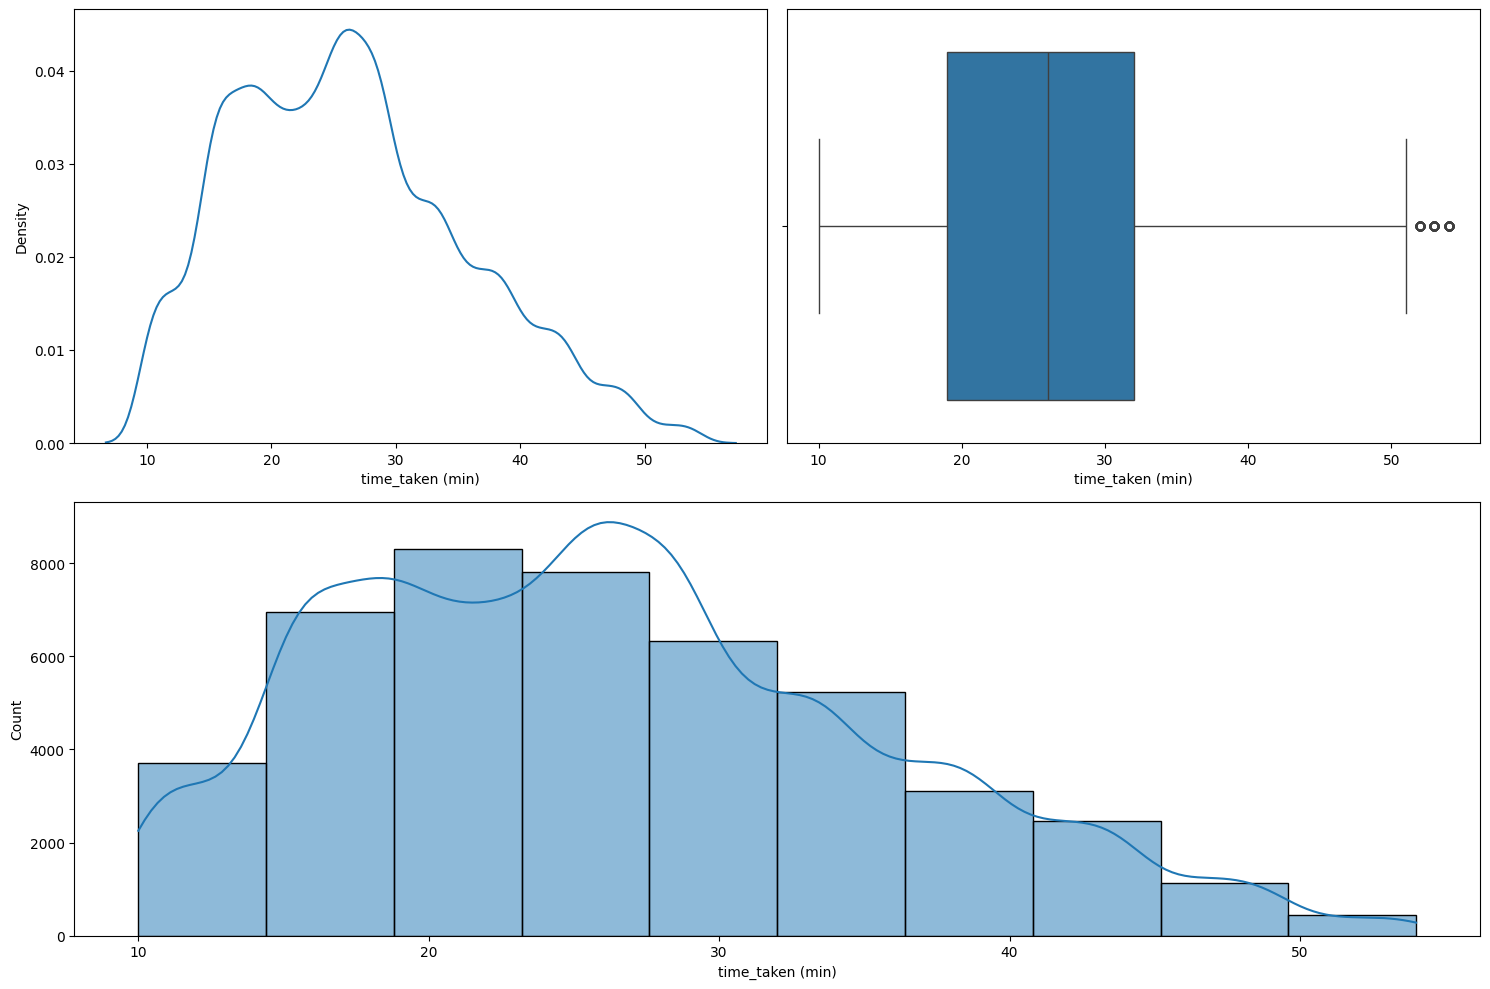

In [17]:
# numerical analysis

numerical_analysis(df, 'time_taken (min)',bins=10)

**Observations**:

1. The target column is not fully continuous in nature.
2. The target column shows dual modality with two peaks- One peak around the 17-18 mark and other around 26-27 mark.
4. The target column has some extreme points which can be thought of as outliers but they are just extreme and rare, not outliers. 50 min time is possible for delivery in certain rare cases.

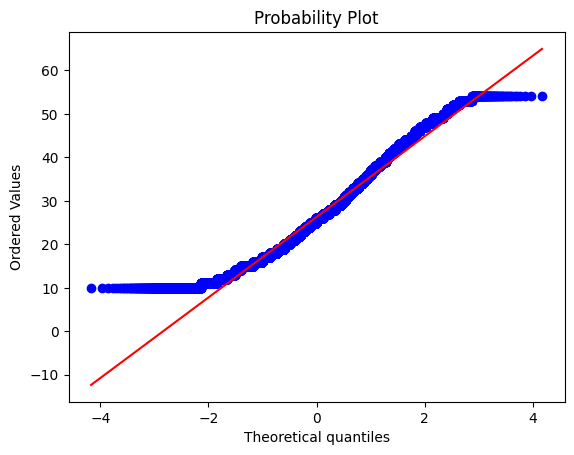

In [18]:
# plot QQ plot for the target

probplot(df['time_taken (min)'], plot=plt)
plt.show()

In [19]:
# tests for normailty

test_for_normality(df, 'time_taken (min)')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [20]:
# check out the rows where data is acting as outlier

target_25_per, target_75_per = np.percentile(df['time_taken (min)'], [25, 75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)

df.loc[(df['time_taken (min)'] > upper_bound),"traffic"].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

In [21]:
df.loc[(df['time_taken (min)'] > upper_bound),"weather_conditions"].value_counts().reset_index()

,weather_conditions,count
0,Fog,57
1,Sunny,51
2,Cloudy,44
3,Windy,44
4,Stormy,37
5,Sandstorms,32


In [22]:
# average distances
avg_distance = df.loc[:,"distance"].mean()
avg_distance_extreme = df.loc[(df['time_taken (min)'] > upper_bound),"distance"].mean()

print(avg_distance, avg_distance_extreme)

9.71896877911282 13.292145748987855


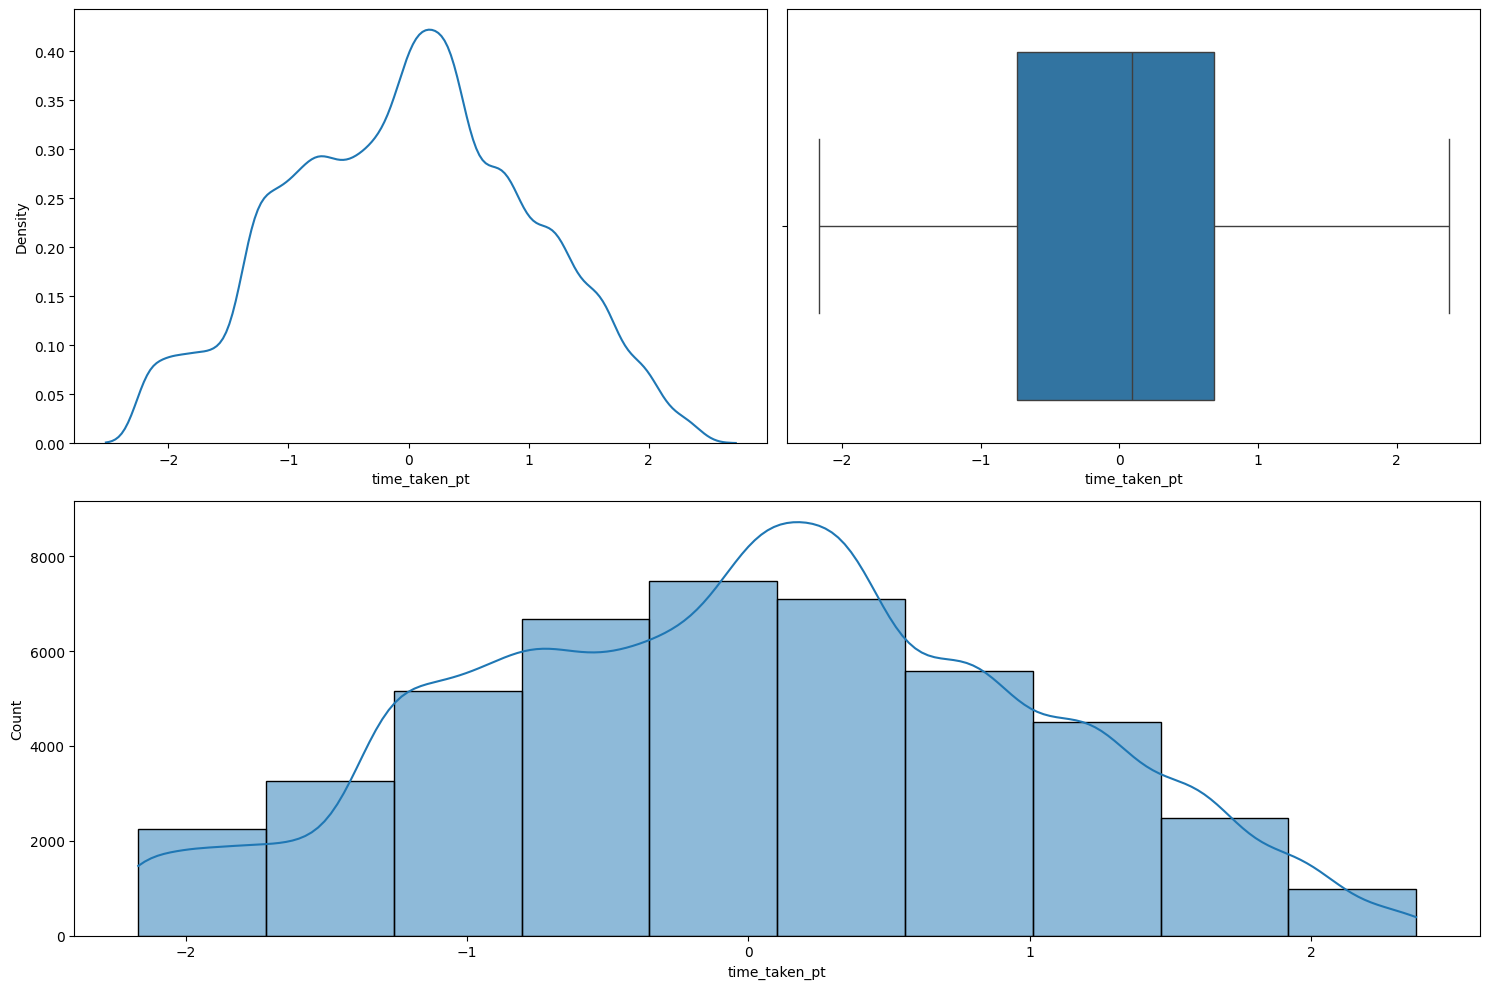

In [23]:
# fix traget column using transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df['time_taken_pt'] = pt.fit_transform(df[['time_taken (min)']])

numerical_analysis(df, "time_taken_pt", bins=10)

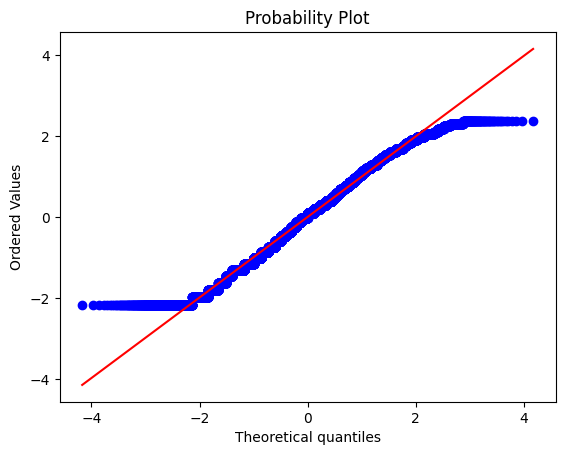

In [24]:
# plot QQ plot for the target after transformation

probplot(df['time_taken_pt'], plot=plt)
plt.show()

## Rider_ID

In [25]:
# sample of data

rider_id_group = df[["rider_id","age","ratings"]].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

,rider_id,age,ratings
83,AGRRES010DEL01,34.0,4.7
13214,AGRRES010DEL01,39.0,4.4
12407,AGRRES010DEL01,34.0,4.5
4545,AGRRES010DEL01,38.0,4.7
7729,AGRRES010DEL01,21.0,4.7
...,...,...,...
9744,VADRES20DEL03,38.0,4.8
5137,VADRES20DEL03,37.0,4.9
9783,VADRES20DEL03,30.0,4.6
852,VADRES20DEL03,35.0,4.8


In [26]:
# check for duplicates

df[["rider_id","age","ratings"]].dropna().duplicated(keep=False).sum()

10150

In [27]:
# filter the duplicates

(
    df
    .loc[(df[["rider_id","age","ratings"]].duplicated(keep=False)),["rider_id","age","ratings"]]
    .dropna()
    .sort_values(["rider_id"])
)

,rider_id,age,ratings
40276,AGRRES03DEL02,24.0,4.9
18524,AGRRES03DEL02,24.0,4.9
26266,AGRRES03DEL03,30.0,4.7
28464,AGRRES03DEL03,30.0,4.7
36122,AGRRES06DEL02,36.0,4.9
...,...,...,...
23651,VADRES20DEL02,29.0,4.8
17954,VADRES20DEL03,35.0,4.9
5137,VADRES20DEL03,37.0,4.9
21948,VADRES20DEL03,37.0,4.9


## Age

In [28]:
# statistical summary

df['age'].describe()

count    43639.000000
mean        29.554779
std          5.761378
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

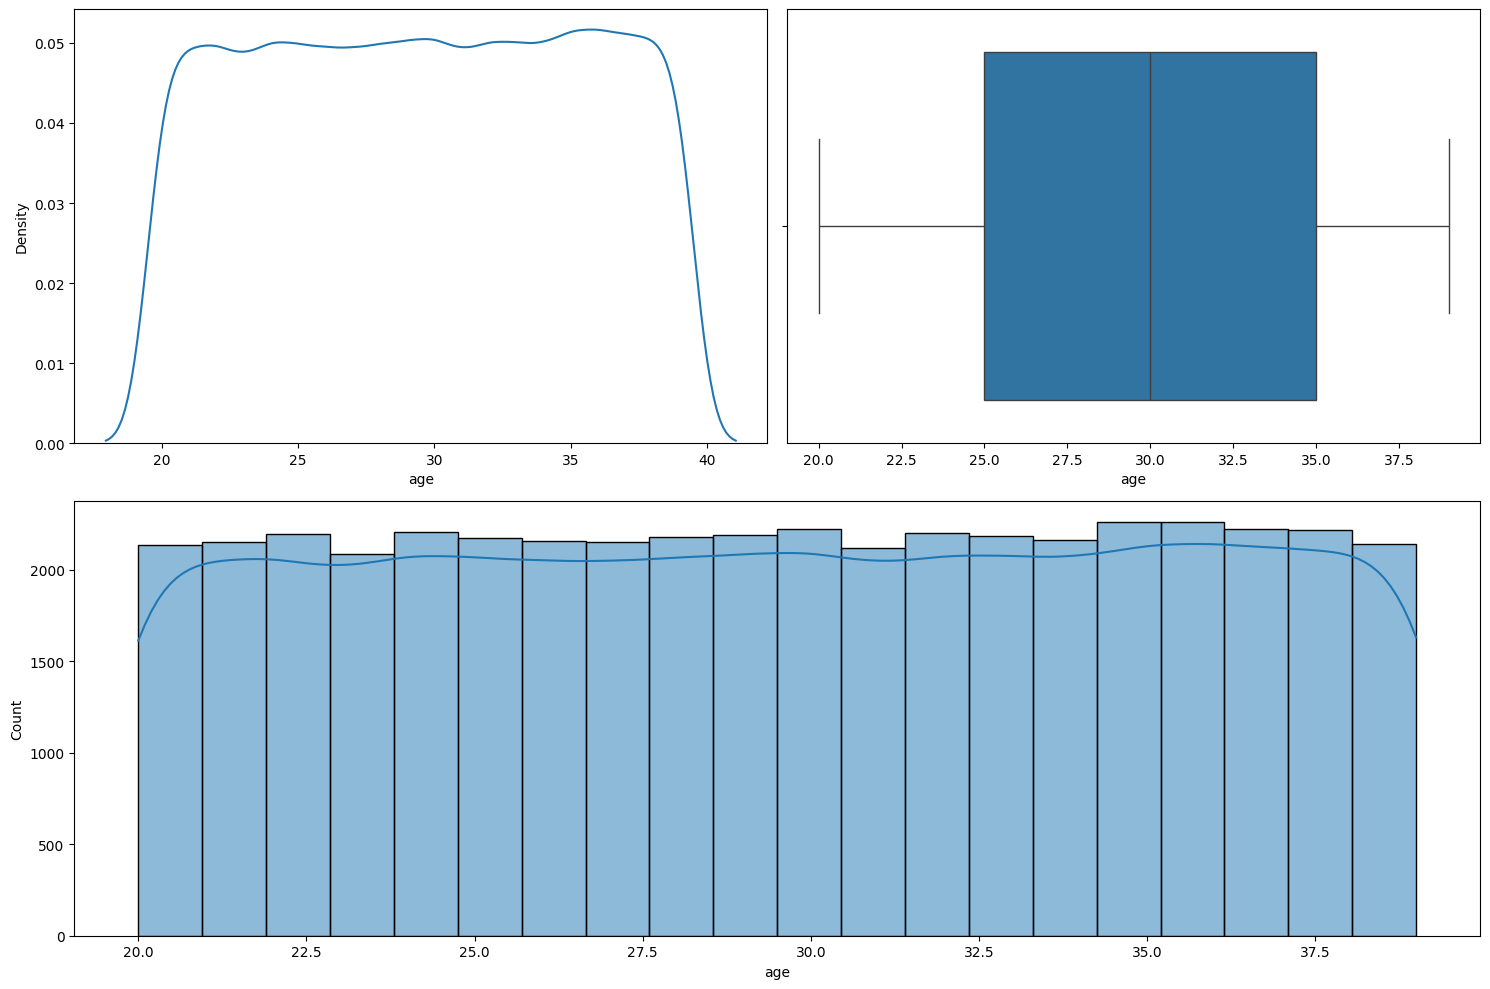

In [29]:
# numerical analysis for age

numerical_analysis(df, 'age',bins=20)

<Axes: xlabel='age', ylabel='time_taken (min)'>

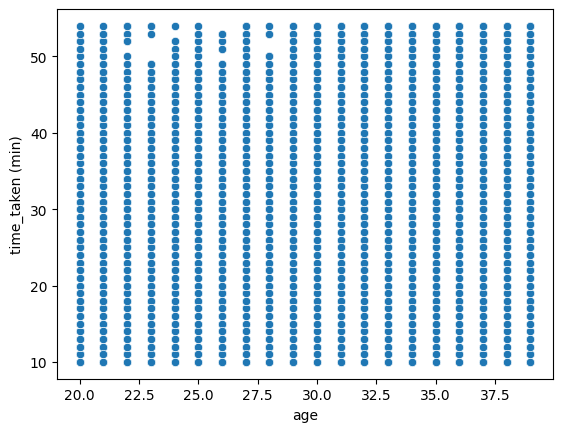

In [30]:
sns.scatterplot(data = df, x = 'age', y= 'time_taken (min)')

* The Riders age does not impact the time of the delivery 

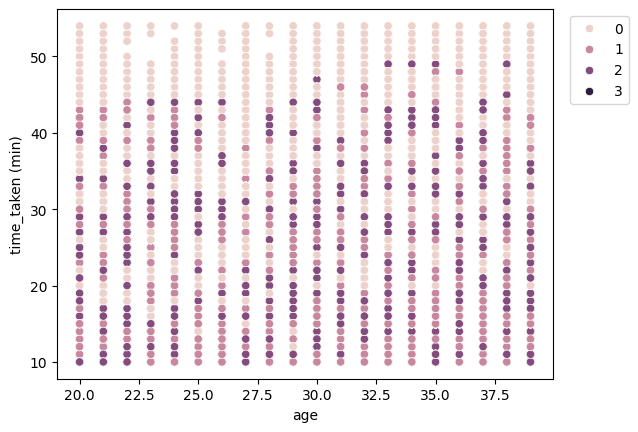

In [31]:
sns.scatterplot(data = df, x ='age', y= 'time_taken (min)', hue = 'vehicle_condition')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

# Ratings

In [32]:
df['ratings'].describe()

count    43585.000000
mean         4.635280
std          0.313851
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

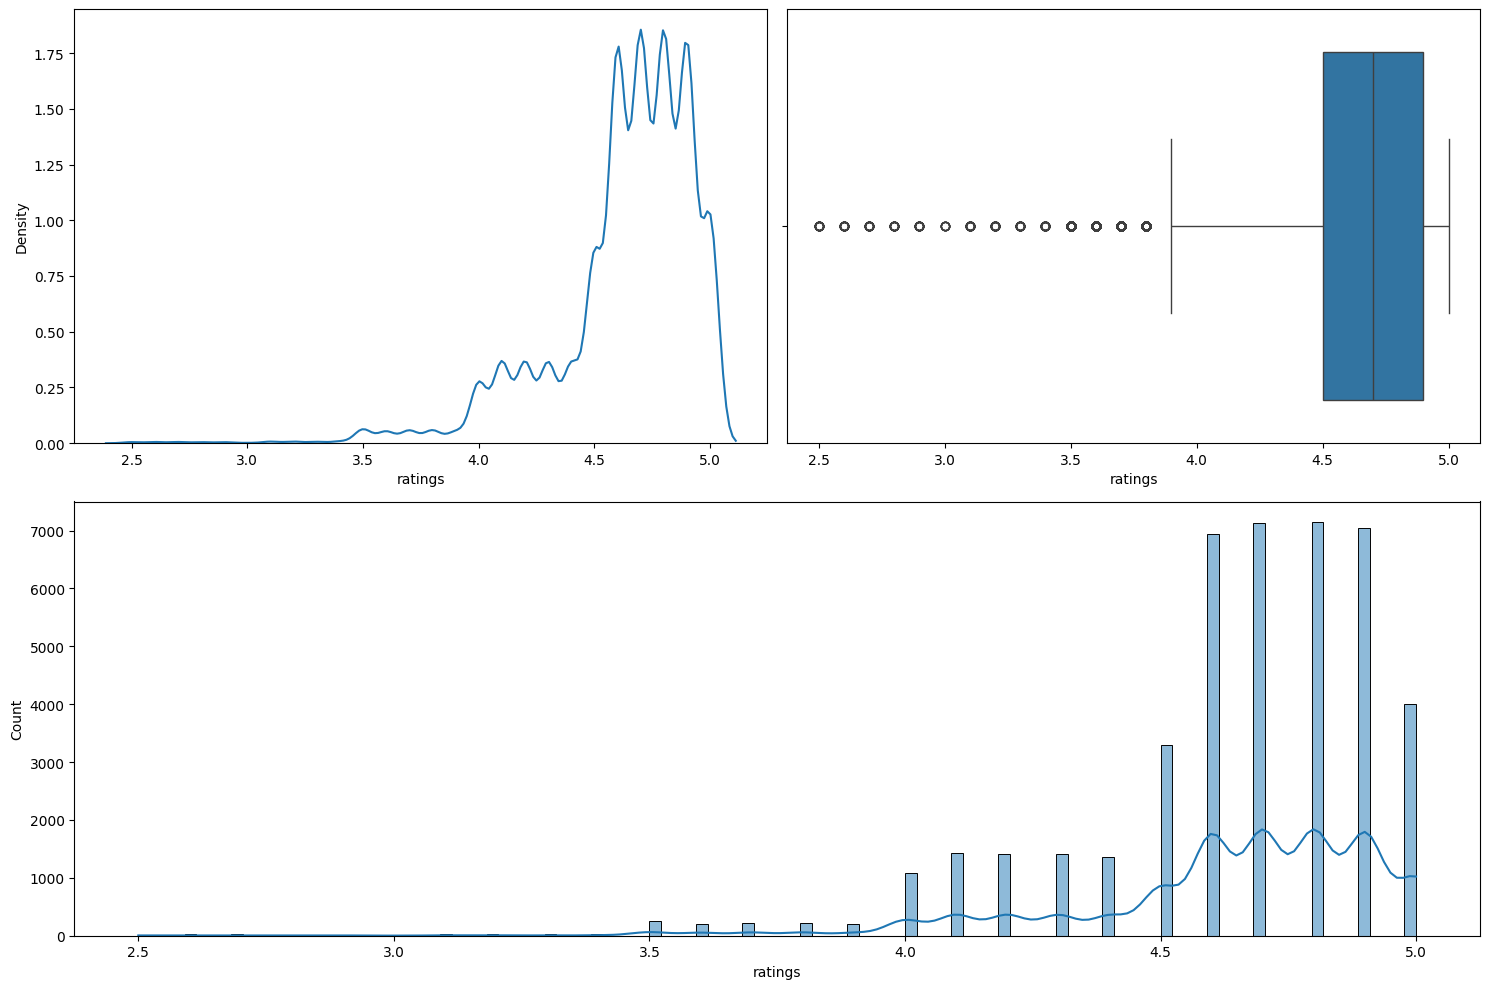

In [33]:
numerical_analysis(df,df['ratings'])

* It seems like riders with more ratings get more orders
  

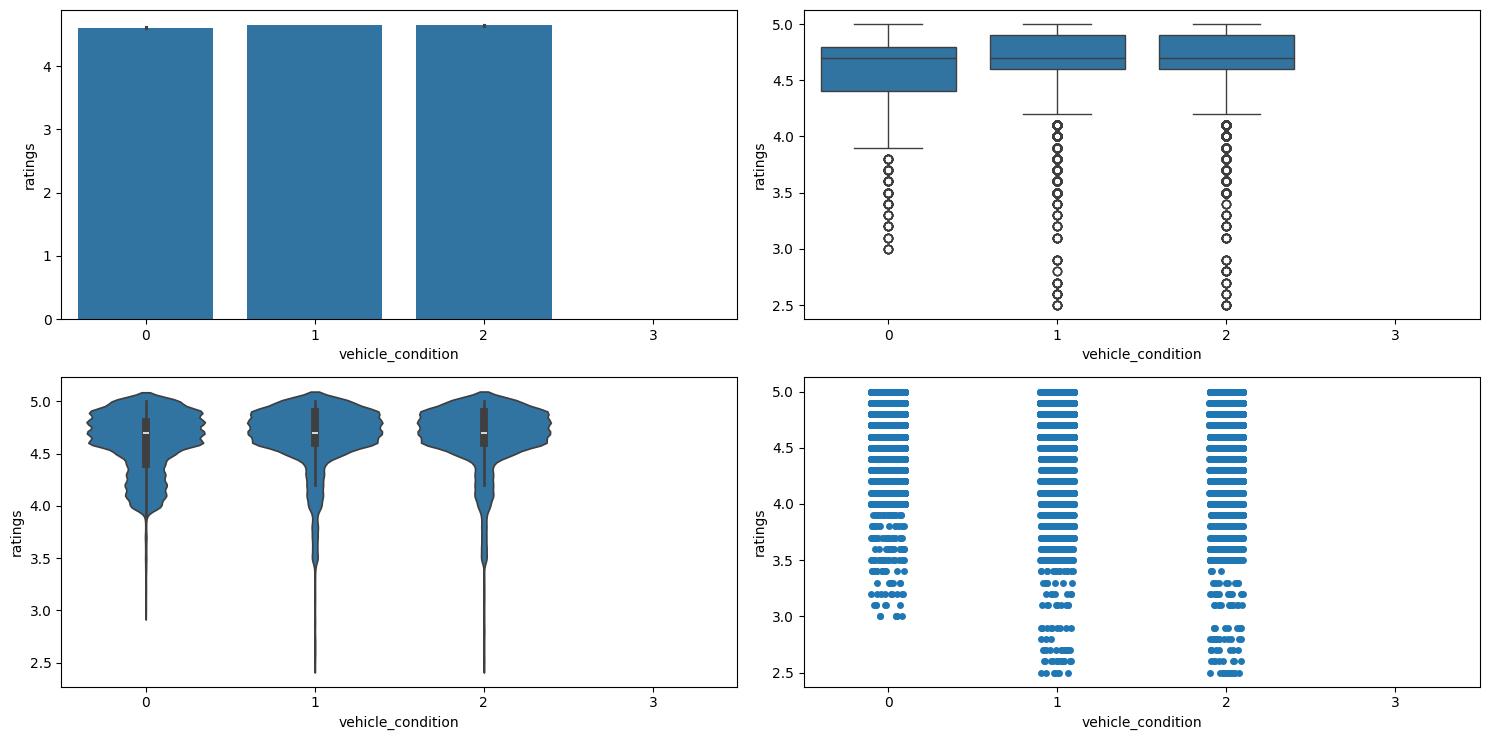

In [34]:
# does ratings get affected by vehicle type

numerical_categorical_analysis(df, 'vehicle_condition', 'ratings')

**Yes they do**

- The more worst the vehicle condition is, the more lower the rating gets.
- The category 3 has no data means there are NaN values. This simply means that customers avoid rating their riders even rating of 1 when the vehicle condition is bad.
- the 0 condition vachicle has >3 reatings 

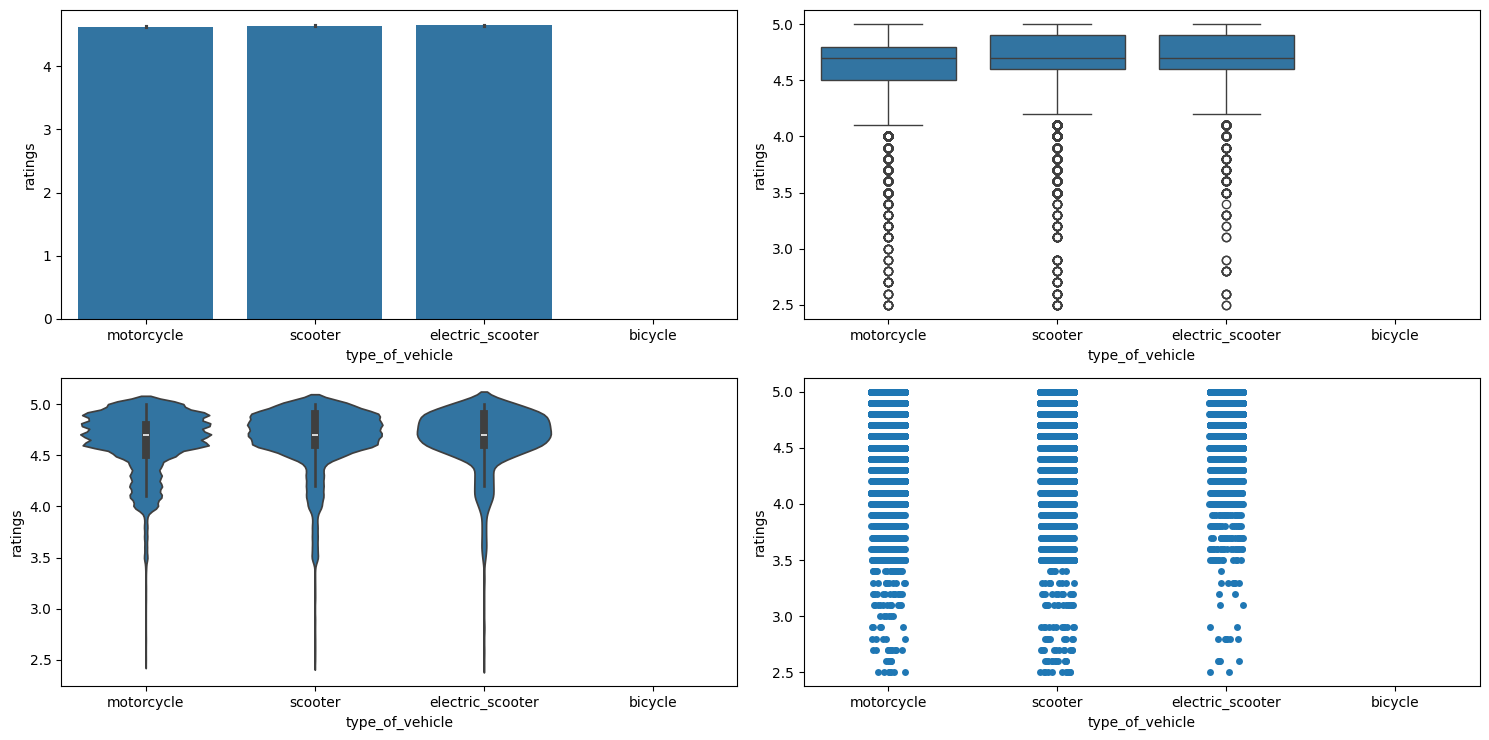

In [35]:
# does type of vehicle affects ratings
numerical_categorical_analysis(df, 'type_of_vehicle', 'ratings')

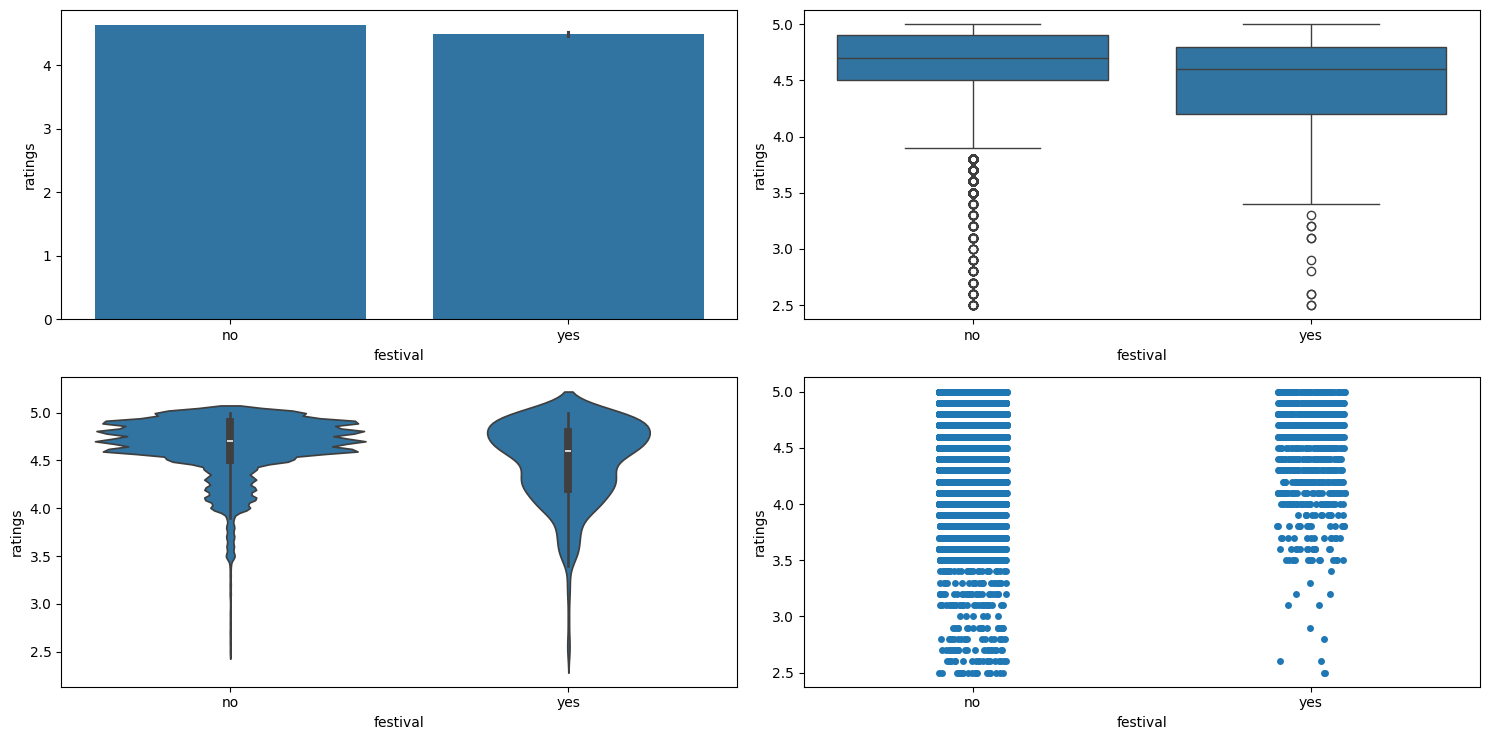

In [36]:
# festvals and rider ratings

numerical_categorical_analysis(df, 'festival', 'ratings')

## Loc_columns -

In [37]:
df.columns[3:7].tolist() + ["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

In [38]:
# location subset

location_subset = df.loc[:,df.columns[3:7].tolist() + ["city_name"]]

location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,30.327968,78.046106,30.397968,78.116106,DEH
1,10.003064,76.307589,10.043064,76.347589,KOC
2,18.562450,73.916619,18.652450,74.006619,PUNE
3,30.899584,75.809346,30.919584,75.829346,LUDH
4,26.463504,80.372929,26.593504,80.502929,KNP
...,...,...,...,...,...
45488,26.902328,75.794257,26.912328,75.804257,JAP
45489,NaN,NaN,NaN,NaN,AGR
45490,13.022394,80.242439,13.052394,80.272439,CHEN
45491,11.001753,76.986241,11.041753,77.026241,COIMB


In [39]:
# drop missing values

location_subset.dropna(inplace=True)

location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,30.327968,78.046106,30.397968,78.116106,DEH
1,10.003064,76.307589,10.043064,76.347589,KOC
2,18.562450,73.916619,18.652450,74.006619,PUNE
3,30.899584,75.809346,30.919584,75.829346,LUDH
4,26.463504,80.372929,26.593504,80.502929,KNP
...,...,...,...,...,...
45487,23.371292,85.327872,23.481292,85.437872,RANCHI
45488,26.902328,75.794257,26.912328,75.804257,JAP
45490,13.022394,80.242439,13.052394,80.272439,CHEN
45491,11.001753,76.986241,11.041753,77.026241,COIMB


## Order Date 

In [40]:
df.columns 

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken (min)', 'city_name', 'order_day',
       'order_month', 'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'time_taken_pt'],
      dtype='object')

In [41]:
# Filter al the order named cols 

df.filter(like="order")

,order_date,type_of_order,order_day,order_month,order_day_of_week,order_time_hour,order_time_of_day
0,2022-12-02,snack,2,12,friday,21.0,night
1,2022-02-13,meal,13,2,sunday,14.0,afternoon
2,2022-04-03,drinks,3,4,sunday,17.0,evening
3,2022-02-13,buffet,13,2,sunday,9.0,morning
4,2022-02-14,snack,14,2,monday,19.0,evening
...,...,...,...,...,...,...,...
45488,2022-03-24,meal,24,3,thursday,11.0,morning
45489,2022-02-16,buffet,16,2,wednesday,19.0,evening
45490,2022-11-03,drinks,3,11,thursday,23.0,night
45491,2022-07-03,snack,3,7,sunday,13.0,afternoon


In [42]:
# order date columns

order_date_subset = df.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]

order_date_subset

,order_date,order_day,order_month,order_day_of_week,is_weekend,festival
0,2022-12-02,2,12,friday,0,no
1,2022-02-13,13,2,sunday,1,no
2,2022-04-03,3,4,sunday,1,no
3,2022-02-13,13,2,sunday,1,no
4,2022-02-14,14,2,monday,0,no
...,...,...,...,...,...,...
45488,2022-03-24,24,3,thursday,0,no
45489,2022-02-16,16,2,wednesday,0,no
45490,2022-11-03,3,11,thursday,0,no
45491,2022-07-03,3,7,sunday,1,no


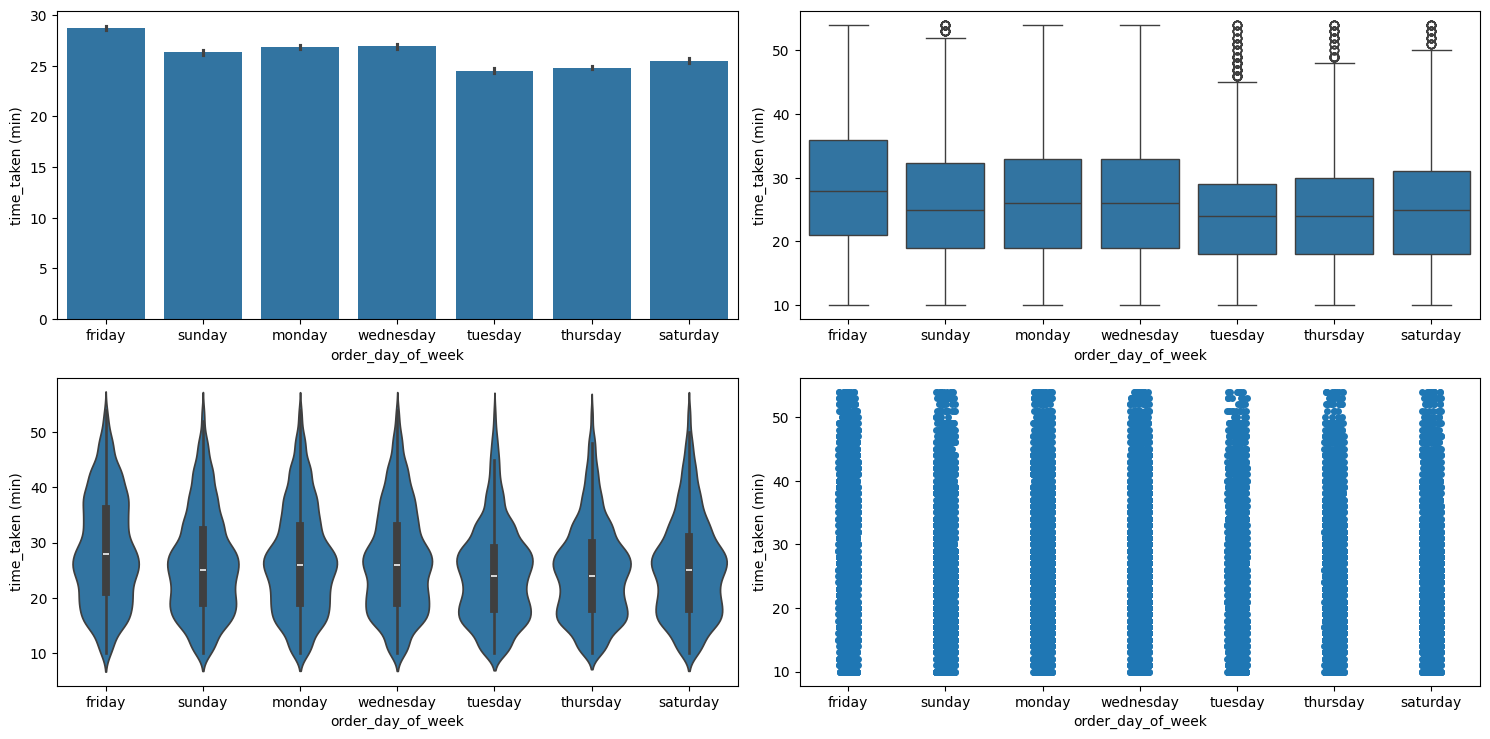

In [43]:
# analysis between day of week and target

numerical_categorical_analysis(df, "order_day_of_week", "time_taken (min)")

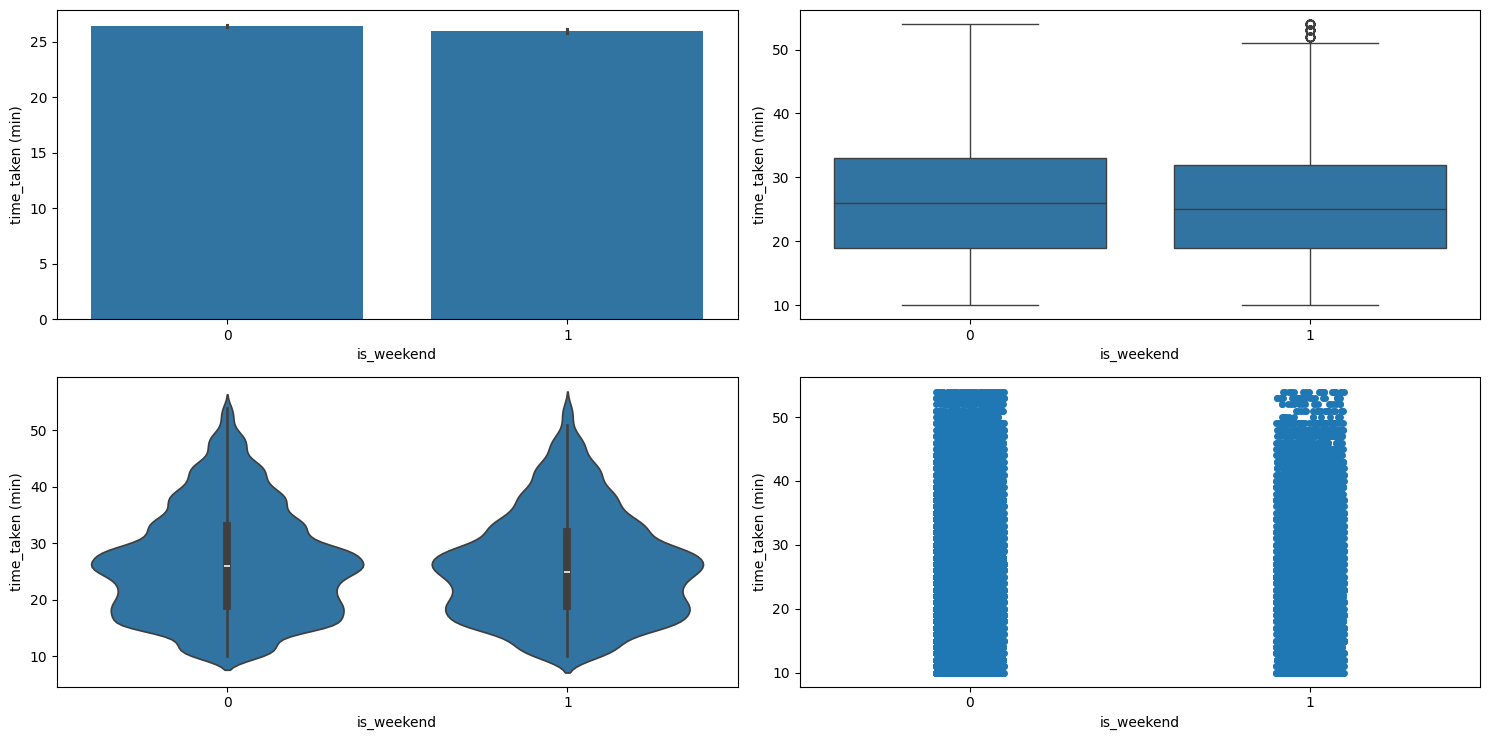

In [44]:
# does having a weekend affects target

numerical_categorical_analysis(df, "is_weekend", "time_taken (min)")

* there is no affect of weekend on delivery time 

In [45]:
# do weekends have an impact on traffic

chi_2_test(df, "is_weekend", "traffic")

0.0014972536514541363
Reject the null hypothesis. There is a significant association between is_weekend and traffic.


<Axes: xlabel='is_weekend', ylabel='count'>

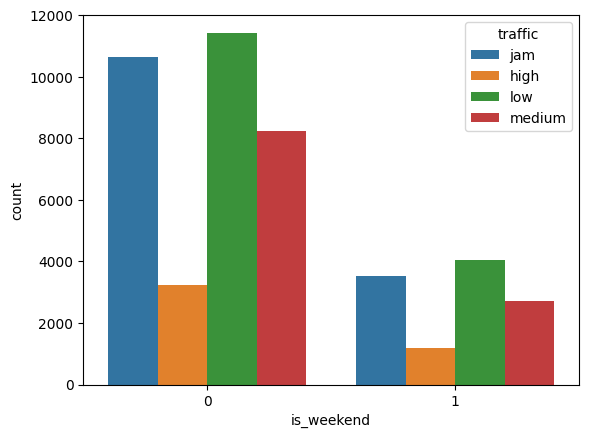

In [46]:
sns.countplot(x='is_weekend', hue="traffic", data=df)

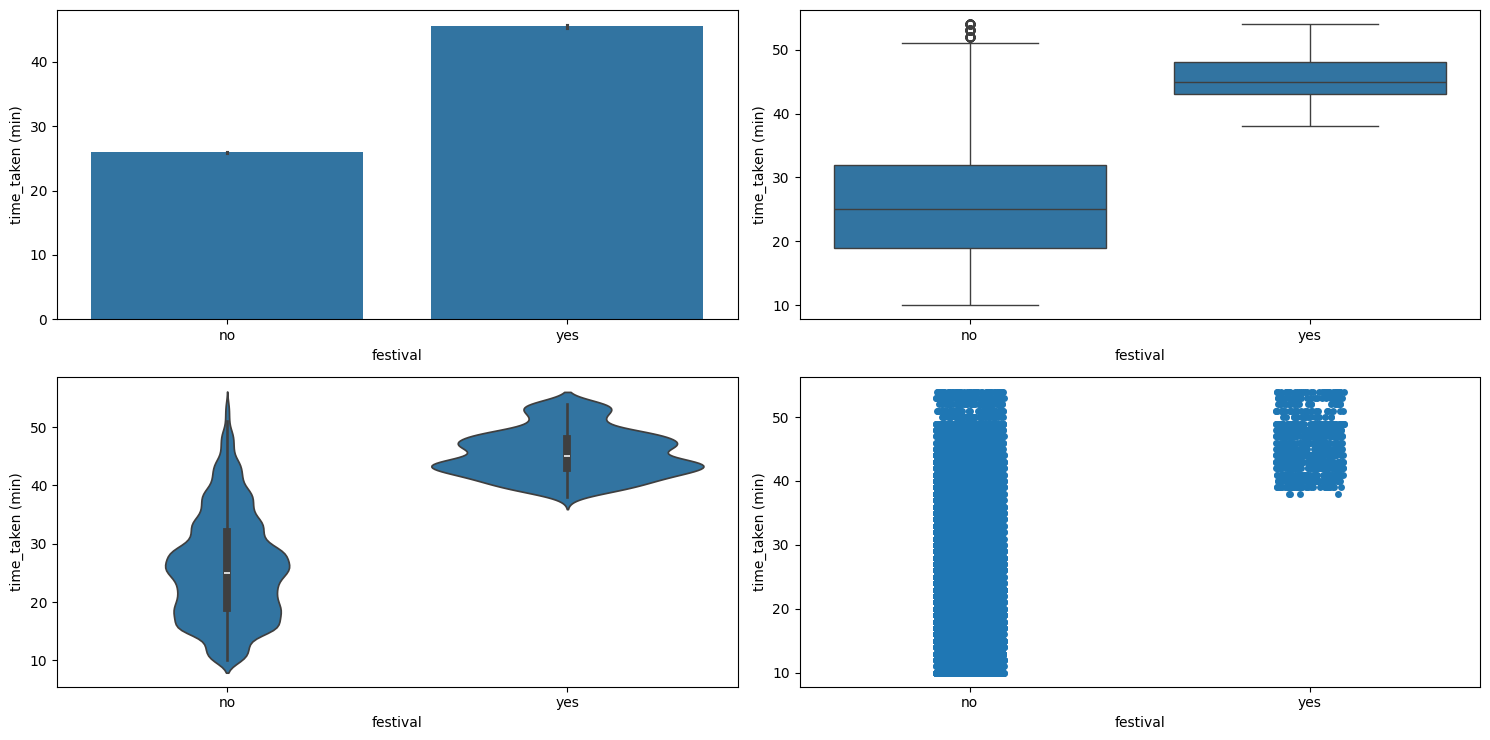

In [47]:
# festivals and target analysis

numerical_categorical_analysis(df, "festival", "time_taken (min)")

In [48]:
# do weekends have an impact on traffic

chi_2_test(df, "festival", "traffic")

1.0490531516981607e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


In [49]:
df.pivot_table(index = 'traffic', values='time_taken (min)', columns="festival",aggfunc='mean')

festival,no,yes
traffic,,
high,27.010378,45.826087
jam,30.537234,46.093651
low,21.284024,42.020000
medium,26.550297,43.715385


* As we can see in the pivot table that festivals affect a lot on delvery 

# Order Time 

In [50]:
# time related columns

time_subset = df.loc[:,["order_time_hour","order_time_of_day","pickup_time_minutes"]]

time_subset

,order_time_hour,order_time_of_day,pickup_time_minutes
0,21.0,night,15.0
1,14.0,afternoon,10.0
2,17.0,evening,10.0
3,9.0,morning,10.0
4,19.0,evening,15.0
...,...,...,...
45488,11.0,morning,10.0
45489,19.0,evening,15.0
45490,23.0,night,NaN
45491,13.0,afternoon,5.0


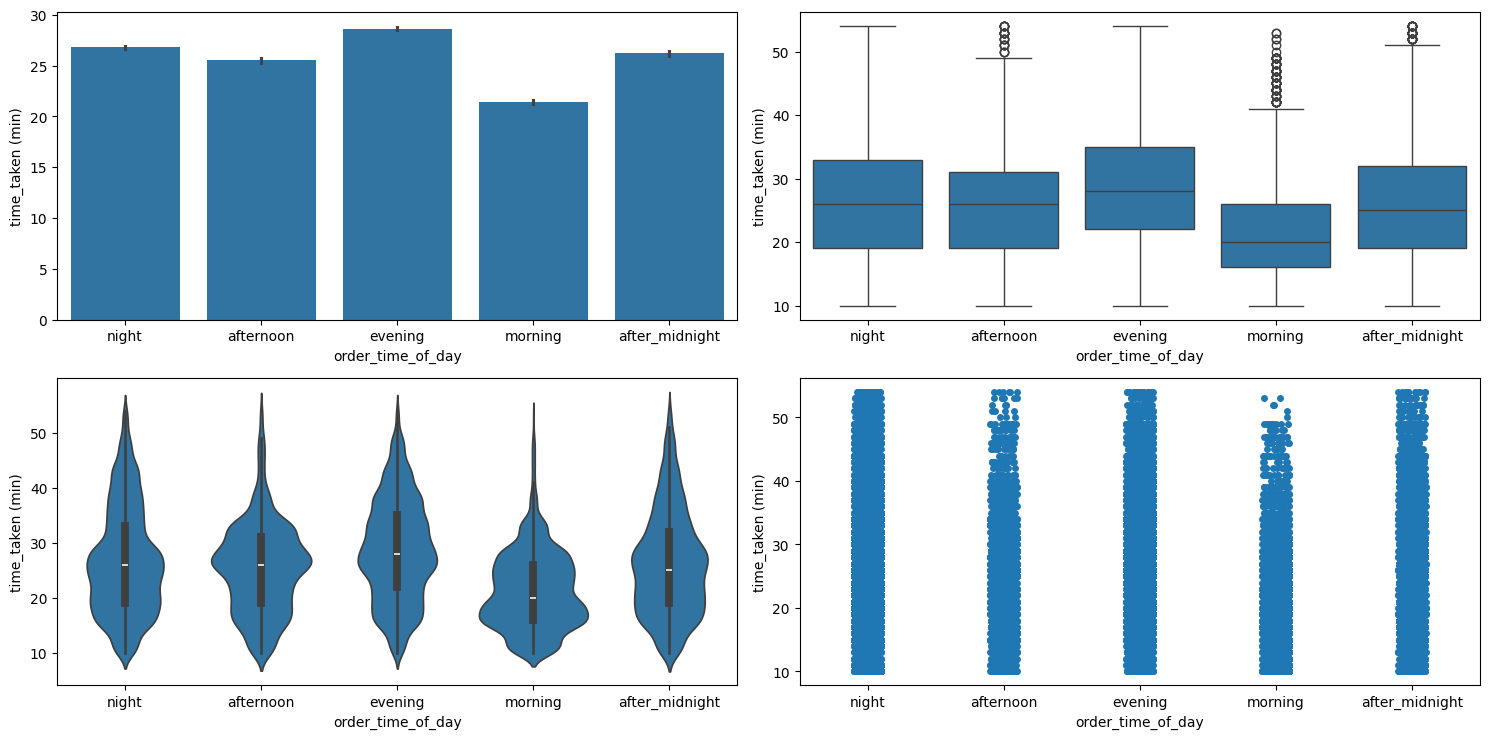

In [51]:
# does time_of_day affects delivery times

numerical_categorical_analysis(df, "order_time_of_day", "time_taken (min)")

In [52]:
# anova test

anova_test(df, "time_taken (min)", "order_time_of_day")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken (min) and order_time_of_day.


,Count,Percentage
order_time_hour,,
21.0,4276,10.75%
17.0,4211,10.58%
22.0,4172,10.49%
19.0,4169,10.48%
20.0,4089,10.28%
23.0,4089,10.28%
18.0,4077,10.25%
8.0,1817,4.57%
10.0,1780,4.47%


**************************************************
The unique categories in order_time_hour column are [21.0, 14.0, 17.0, 9.0, 19.0, 20.0, 22.0, 8.0, 12.0, 18.0, 23.0, 13.0, nan, 10.0, 16.0, 11.0, 15.0]
**************************************************
The number of categories in order_time_hour column are 16


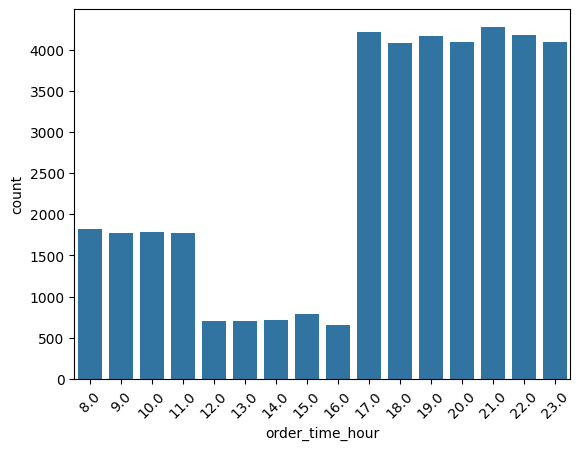

In [53]:
# categorical analysis on order_time_hour

categorical_analysis(df, "order_time_hour")

,Count,Percentage
order_time_of_day,,
night,16626,36.55%
evening,12457,27.38%
morning,7135,15.68%
after_midnight,5708,12.55%
afternoon,3567,7.84%


**************************************************
The unique categories in order_time_of_day column are ['night', 'afternoon', 'evening', 'morning', 'after_midnight']
**************************************************
The number of categories in order_time_of_day column are 5


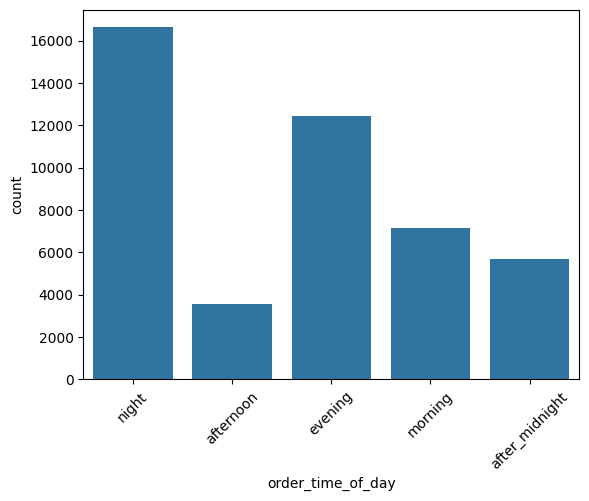

In [54]:
# categorical analysis on time of day

categorical_analysis(df, "order_time_of_day")

## pickup_time

,Count,Percentage
pickup_time_minutes,,
5.0,12022,33.95%
10.0,11753,33.19%
15.0,11632,32.85%


**************************************************
The unique categories in pickup_time_minutes column are [15.0, 10.0, 5.0, nan]
**************************************************
The number of categories in pickup_time_minutes column are 3


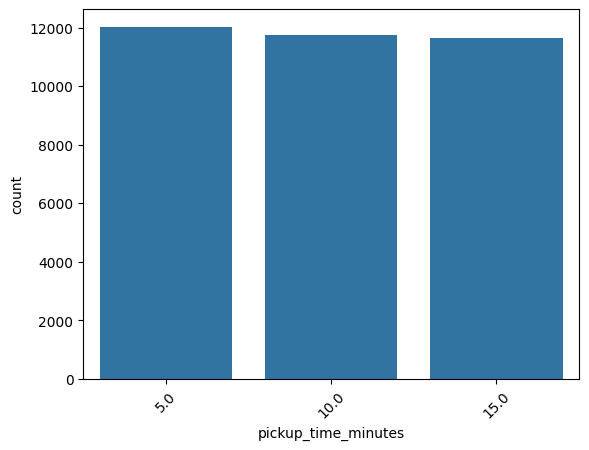

In [55]:
# pickup time categorical analysis

categorical_analysis(df, "pickup_time_minutes")

In [56]:
anova_test(df, 'pickup_time_minutes', 'time_taken (min)')

0.6144405876033907
Fail to reject the null hypothesis. There is no significant relationship between pickup_time_minutes and time_taken (min).


## Traffic

In [57]:
# datatype of traffic column

df['traffic'].dtype

dtype('O')

In [58]:
# does traffic depends on type of city

chi_2_test(df, "traffic", "city_type")

2.628471738211753e-104
Reject the null hypothesis. There is a significant association between traffic and city_type.


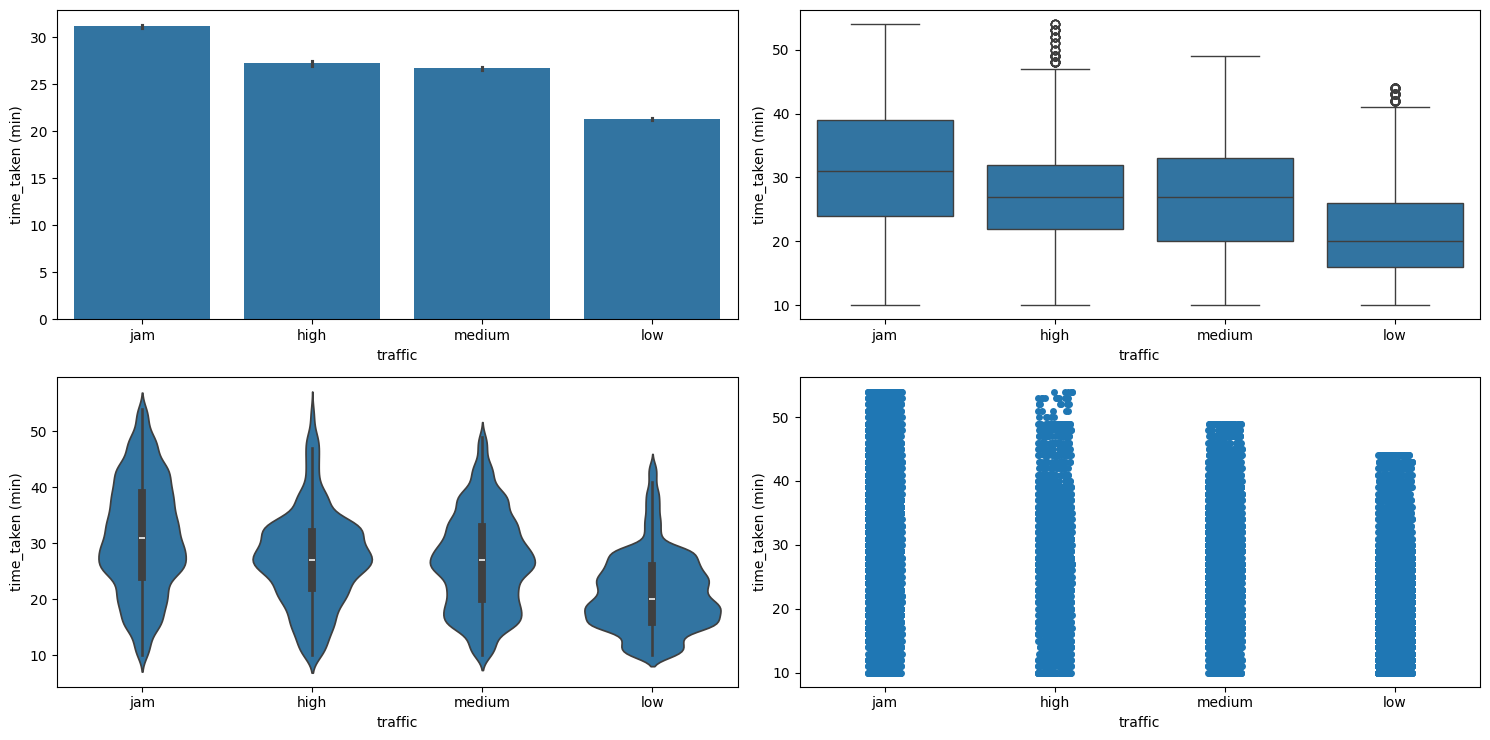

In [59]:
# does traffic affects delivery times

numerical_categorical_analysis(df, "traffic", "time_taken (min)")

In [60]:
# hypothesis test on does traffic affects delivery times

anova_test(df, "time_taken (min)", "traffic")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken (min) and traffic.


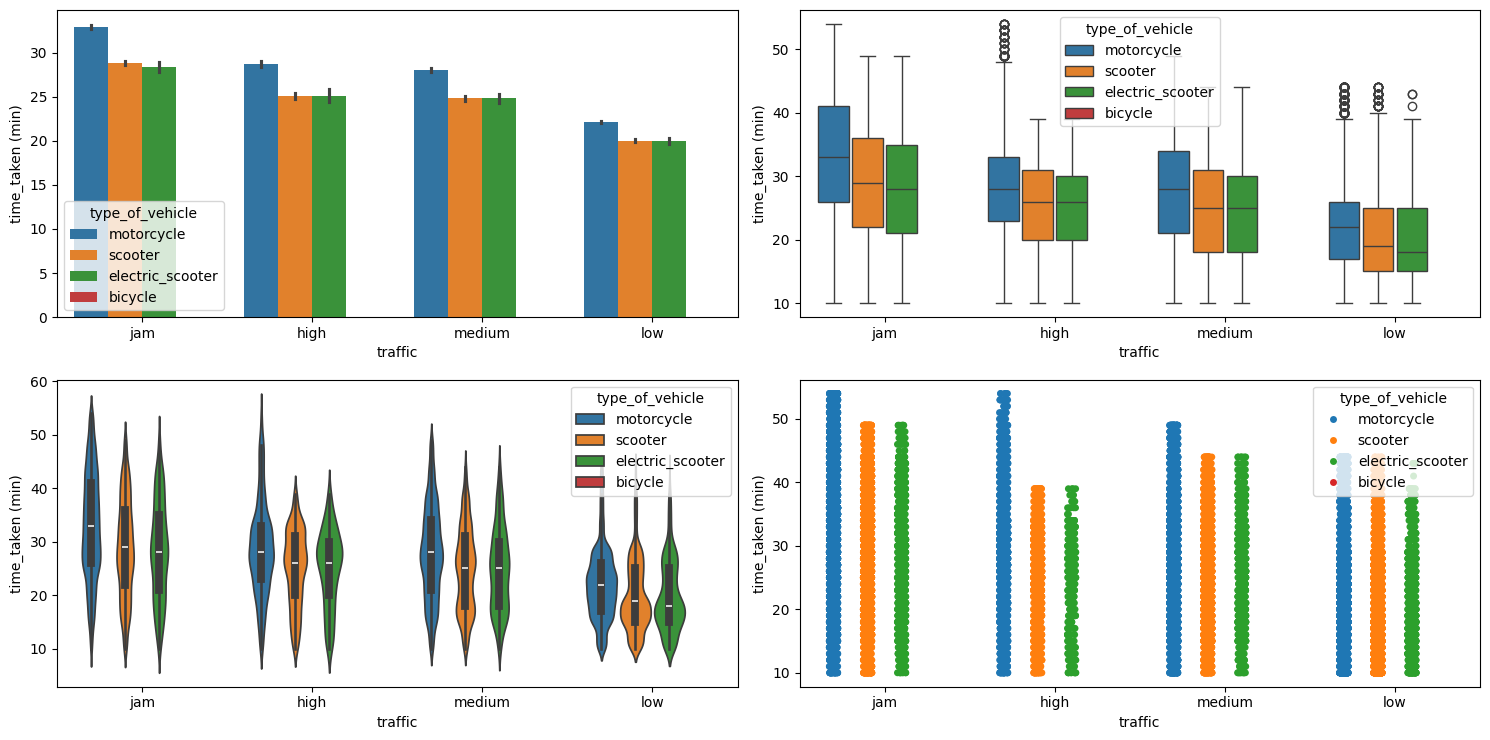

In [62]:
# are some vehicle types more suitable in traffic than others

multivariate_analysis(df, "time_taken (min)", "traffic", "type_of_vehicle")

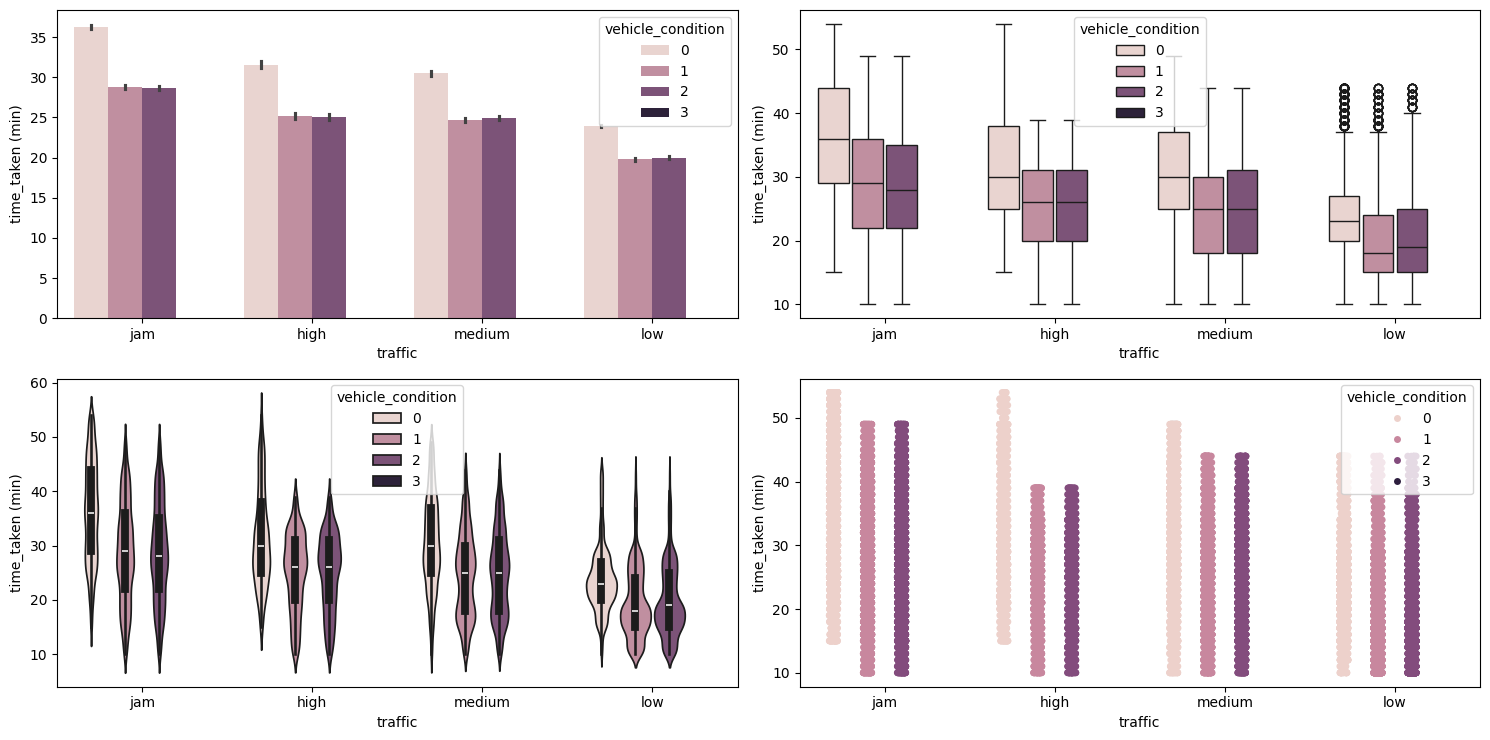

In [63]:
# does vehicle condition in traffic situations affects delivery times

multivariate_analysis(df, "time_taken (min)", "traffic", "vehicle_condition")

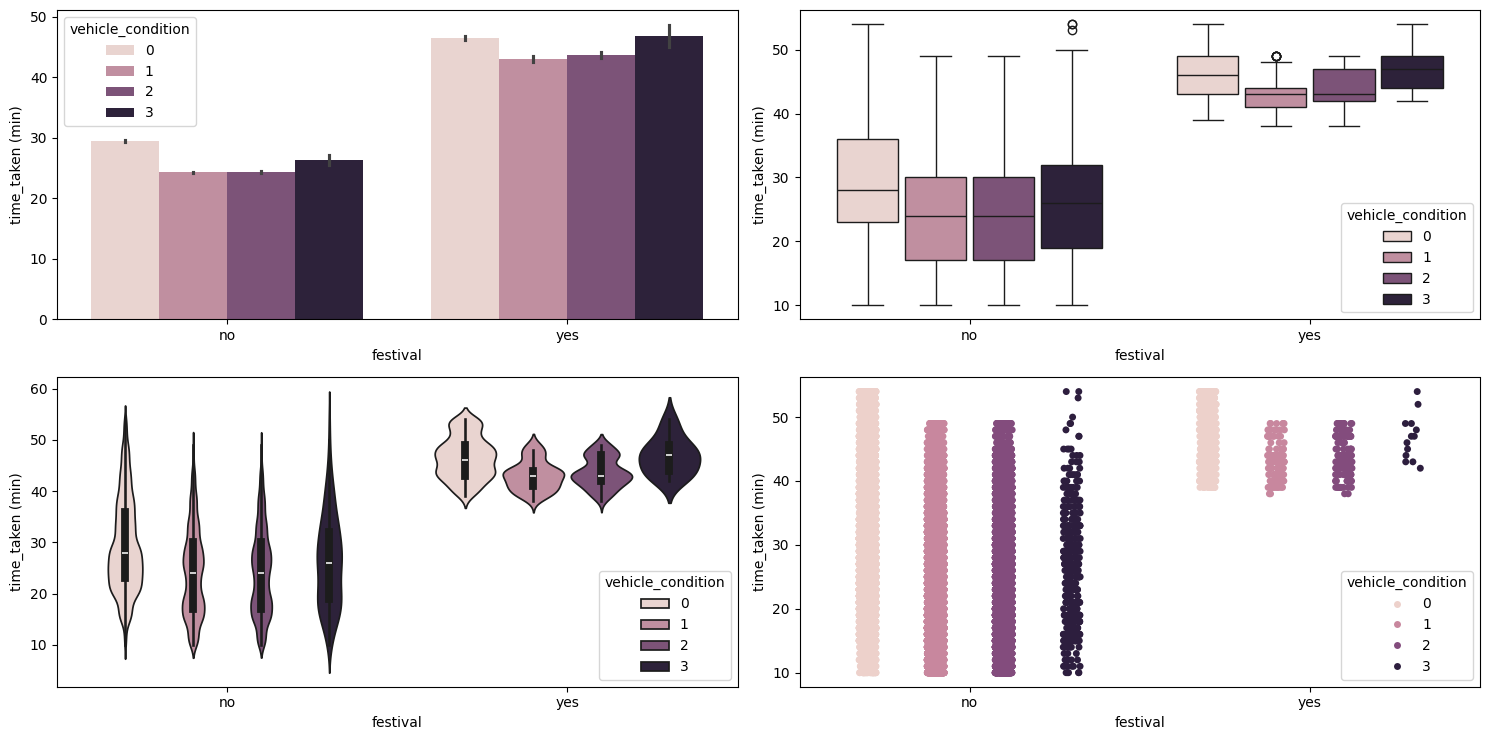

In [65]:

multivariate_analysis(df, "time_taken (min)", "festival", "vehicle_condition")

## Multiple Deliveries 

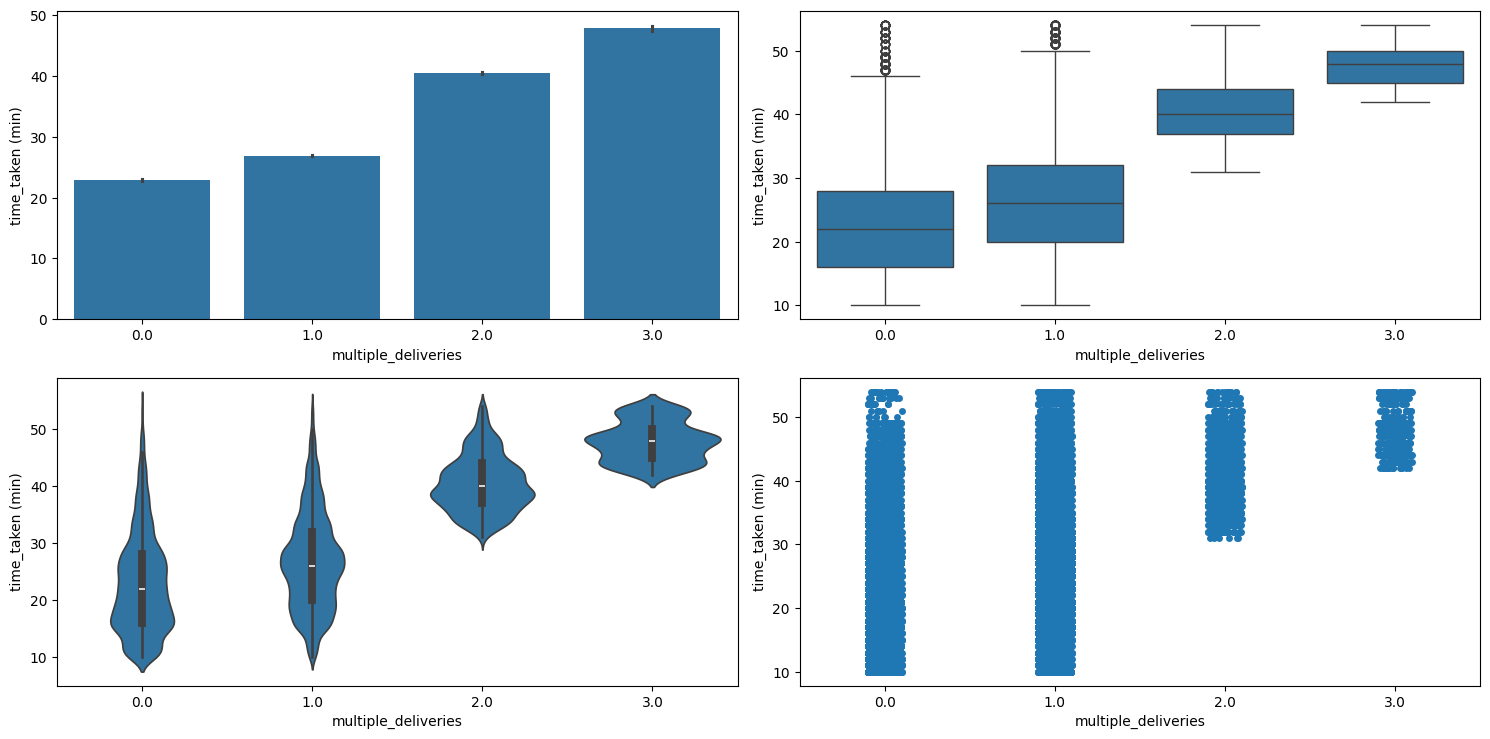

In [66]:
# does multiple delivereis affect delivery times

numerical_categorical_analysis(df, "multiple_deliveries", "time_taken (min)")

**The more the extra deliveries , extra time is taken to deliver , it means there is a relationship between these columns**

In [67]:
# Anova test

anova_test(df, "time_taken (min)", "multiple_deliveries")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken (min) and multiple_deliveries.


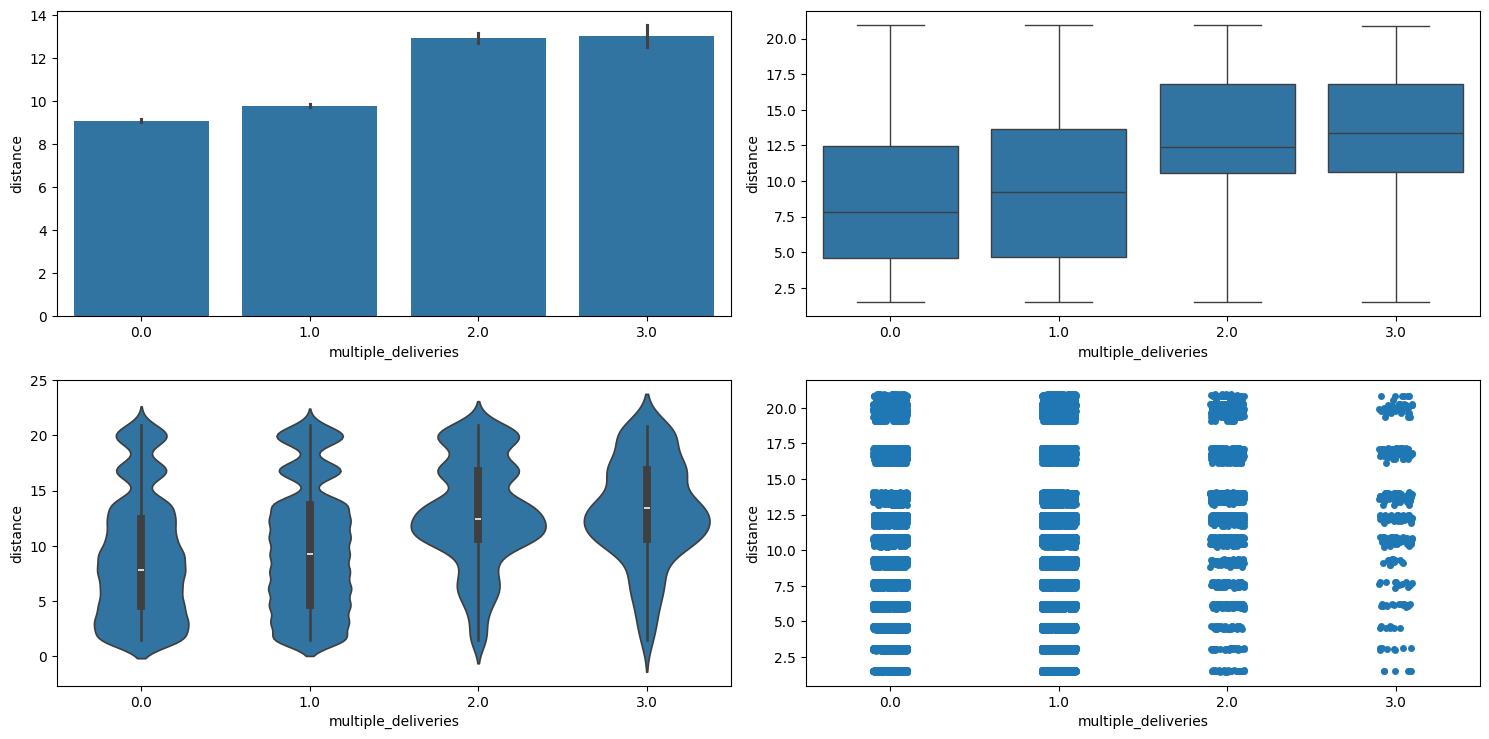

In [68]:
# do multiple deliveries are of longer distances

numerical_categorical_analysis(df, "multiple_deliveries", "distance")

In [70]:
anova_test(df, 'distance', 'multiple_deliveries')

5.332894405595303e-193
Reject the null hypothesis. There is a significant relationship between distance and multiple_deliveries.


## Weather

,Count,Percentage
weather_conditions,,
Fog,7653,17.02%
Stormy,7584,16.87%
Cloudy,7533,16.75%
Sandstorms,7494,16.67%
Windy,7422,16.51%
Sunny,7282,16.19%


**************************************************
The unique categories in weather_conditions column are ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan]
**************************************************
The number of categories in weather_conditions column are 6


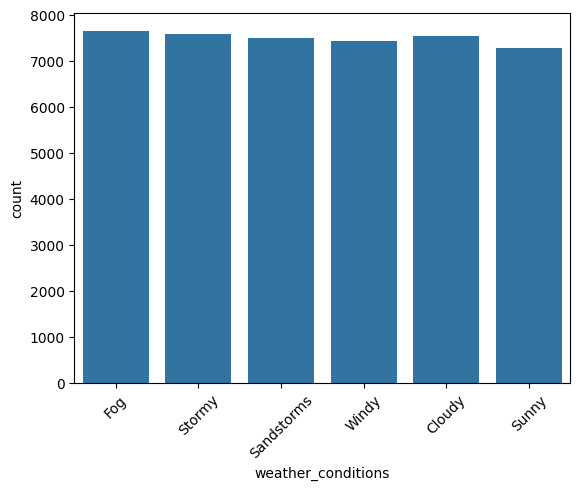

In [73]:
# categorical analysis on type of weather

categorical_analysis(df, "weather_conditions")

In [77]:
# pivot table

df.pivot_table(index="weather_conditions",columns="traffic",values="time_taken (min)",aggfunc="mean")

traffic,high,jam,low,medium
weather_conditions,,,,
Cloudy,28.939435,36.694208,22.208445,28.481219
Fog,28.426546,36.805601,22.303427,28.044816
Sandstorms,27.711840,30.018758,20.294862,27.738522
Stormy,27.845839,29.847049,20.681734,27.680502
Sunny,23.448229,23.082132,21.449293,20.195067
Windy,26.972789,30.219056,20.665862,27.888769


## City name 

,Count,Percentage
city_name,,
JAP,3439,7.56%
RANCHI,3221,7.08%
BANG,3182,6.99%
SUR,3182,6.99%
HYD,3175,6.98%
MUM,3168,6.96%
MYS,3163,6.95%
COIMB,3161,6.95%
VAD,3159,6.94%


**************************************************
The unique categories in city_name column are ['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL', 'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG', 'AGR', 'VAD', 'ALH', 'BHP', 'INDO']
**************************************************
The number of categories in city_name column are 22


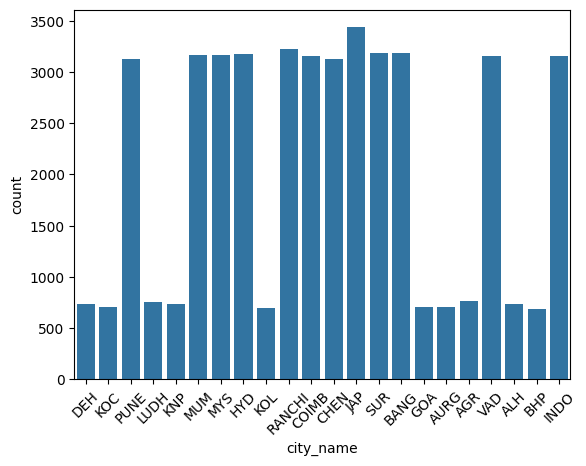

In [79]:
# categorical analysis on city name

categorical_analysis(df, "city_name")

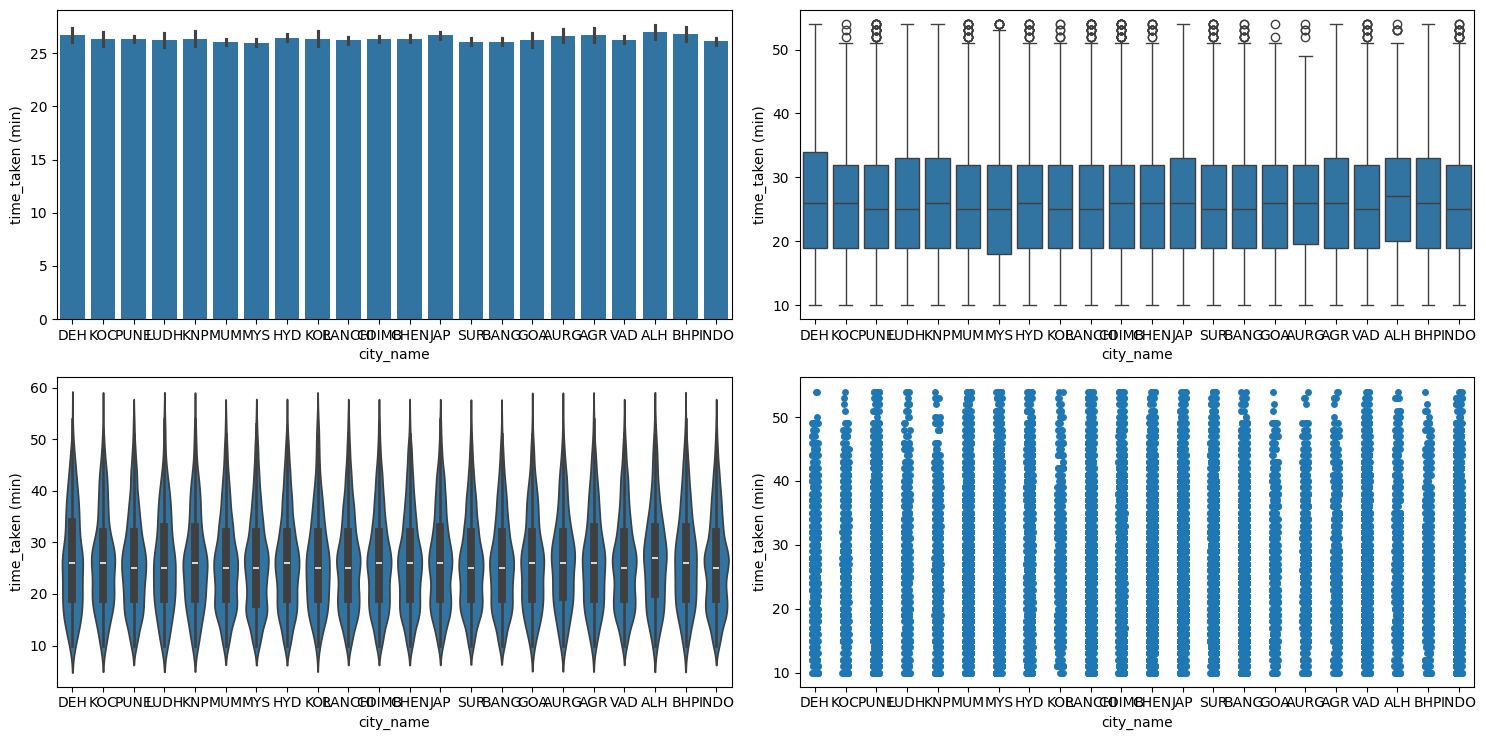

In [81]:
# does a city affects delivery times

numerical_categorical_analysis(df, "city_name", "time_taken (min)")

In [83]:
anova_test(df, 'time_taken (min)', 'city_name')

0.15774019353604193
Fail to reject the null hypothesis. There is no significant relationship between time_taken (min) and city_name.


## Distance

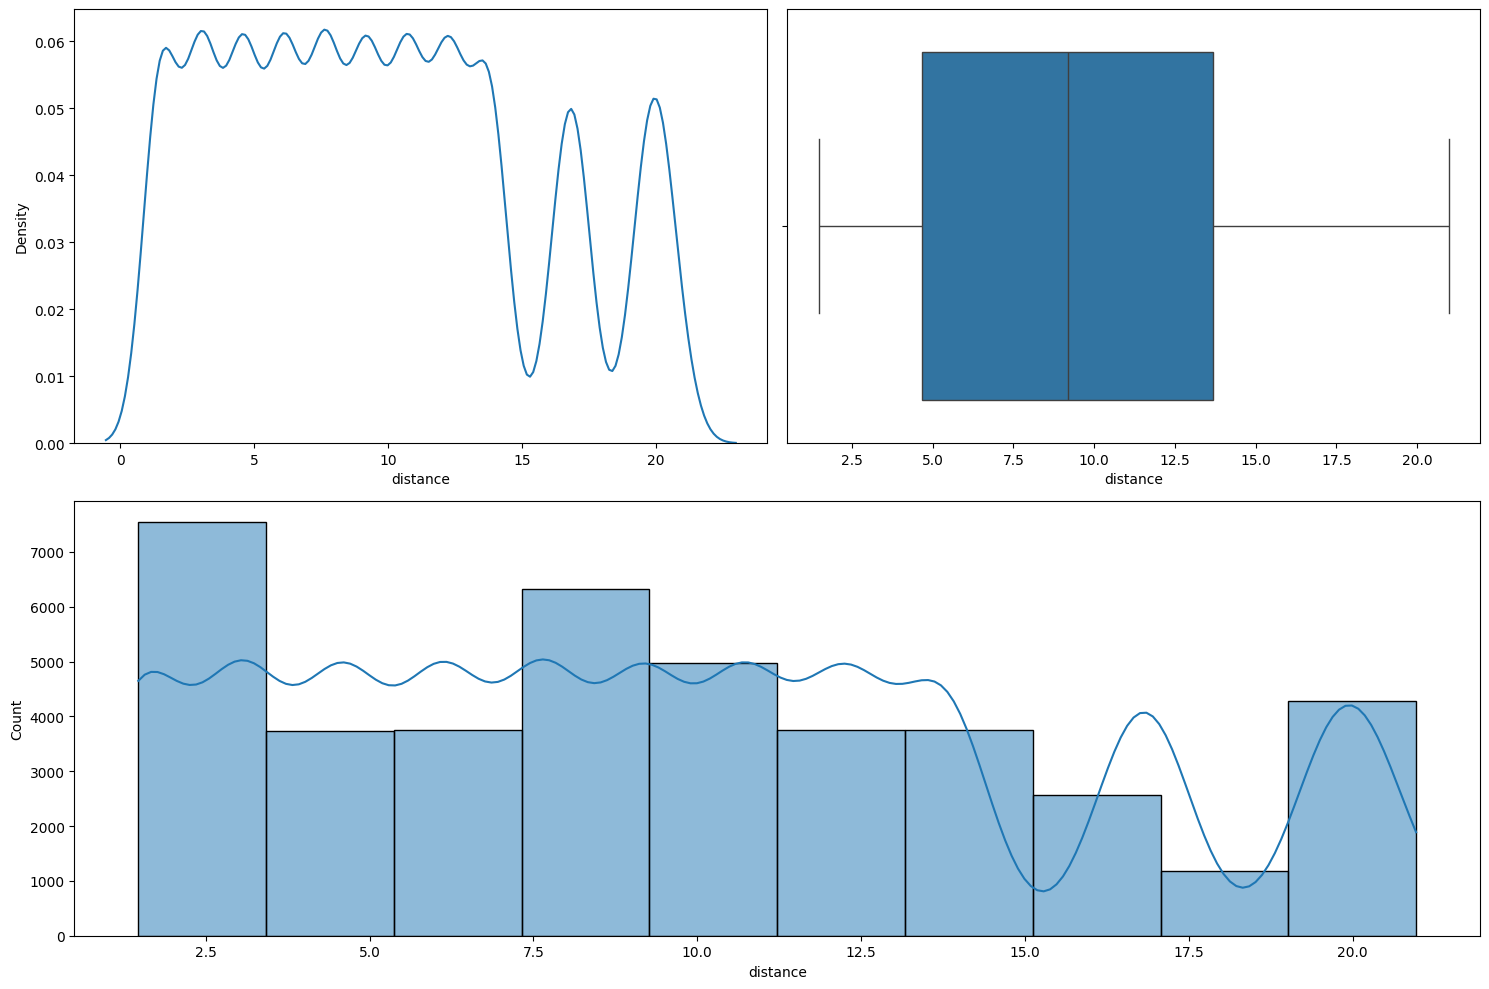

In [84]:
# numerical analysis of distance

numerical_analysis(df, "distance",bins=10)

In [86]:
# corr

df[["distance","time_taken (min)"]].corr()

,distance,time_taken (min)
distance,1.000000,0.320647
time_taken (min),0.320647,1.000000
